## Previsione 1 Step  con CNN per serie univariate

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
from math import sqrt
from keras.models import Sequential
from keras.layers import Dense
from time import time
import os
from IPython.utils import traitlets as _traitlets
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import TensorBoard
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import warnings 
warnings.filterwarnings('ignore')
import tensorflow as tf
from keras import metrics

/Users/alket/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  app.launch_new_instance()


In [5]:
data = pd.read_csv('/Users/alket/Desktop/dati/new_data_backfill_forwfill.csv', index_col = 0)



agg_by_cell = data.groupby(by = ['cell_num'])
one_cell = agg_by_cell.get_group('486-1252')
series = one_cell['nr_people'].values
print(type(series))



<class 'numpy.ndarray'>


### MLP per i dati di una sola cella - previsione 1 step.

In [6]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# choose a number of time steps for the window
n_steps = 10

# split into samples
X, y = split_sequence(series, n_steps)

count = 0
# summarize the data
for i in range(len(X)):
    print(X[i], y[i])
    count +=1
    if count > 3: 
        break

[36. 36. 34. 33. 32. 33. 32. 30. 30. 29.] 29.0
[36. 34. 33. 32. 33. 32. 30. 30. 29. 29.] 27.0
[34. 33. 32. 33. 32. 30. 30. 29. 29. 27.] 27.0
[33. 32. 33. 32. 30. 30. 29. 29. 27. 27.] 25.0


### Normalizzazione

In [7]:
#scaler = MinMaxScaler()
# fit scaler on data

#scaler.fit(X)
# apply transform

#X = scaler.transform(X)
#print(X[0:10])

# fit scaler on data
#y = y.reshape(-1, 1)
#scaler.fit(y)

# apply transform
#y = scaler.transform(y)
#print(y[0:10])

### Train-validation-test 

In [8]:
# split into train and test sets
train_size = int(len(X) * 0.67)
test_size = len(X) - train_size
train_X, test_X = X[0:train_size,:], X[train_size:len(X),:]

train_y, test_y = y[0:train_size], y[train_size:len(y)]
print('X', len(train_X), len(test_X))
print('y ', len(train_y), len(test_y))

#for i in range(len(X)):
    #print(train_X[i],train_y[i] )

X 7904 3894
y  7904 3894


In [9]:
# define model
model = Sequential()
model.add(Dense(400, activation='relu', input_dim=n_steps)) 
model.add(Dense(1))

model.compile(loss='mse',optimizer='adam', metrics=[metrics.mae, 'accuracy'])

model.fit(train_X, train_y, epochs=200, verbose=2)

#history = model.fit(train_X, train_y, epochs=50, verbose=2)
#unk1,unk2, test_acc = model.evaluate(test_X, test_y, verbose=2)

Epoch 1/200
247/247 - 0s - loss: 37.1422 - mean_absolute_error: 3.8357 - accuracy: 0.0000e+00
Epoch 2/200
247/247 - 0s - loss: 4.4542 - mean_absolute_error: 1.6004 - accuracy: 0.0000e+00
Epoch 3/200
247/247 - 0s - loss: 3.7222 - mean_absolute_error: 1.4569 - accuracy: 0.0000e+00
Epoch 4/200
247/247 - 0s - loss: 3.4133 - mean_absolute_error: 1.3942 - accuracy: 0.0000e+00
Epoch 5/200
247/247 - 0s - loss: 3.3981 - mean_absolute_error: 1.3840 - accuracy: 0.0000e+00
Epoch 6/200
247/247 - 0s - loss: 2.9555 - mean_absolute_error: 1.2774 - accuracy: 0.0000e+00
Epoch 7/200
247/247 - 0s - loss: 2.9699 - mean_absolute_error: 1.2877 - accuracy: 0.0000e+00
Epoch 8/200
247/247 - 0s - loss: 2.8519 - mean_absolute_error: 1.2620 - accuracy: 0.0000e+00
Epoch 9/200
247/247 - 0s - loss: 2.7675 - mean_absolute_error: 1.2330 - accuracy: 0.0000e+00
Epoch 10/200
247/247 - 0s - loss: 2.8628 - mean_absolute_error: 1.2707 - accuracy: 0.0000e+00
Epoch 11/200
247/247 - 0s - loss: 2.6733 - mean_absolute_error: 1.21

Epoch 89/200
247/247 - 0s - loss: 2.2807 - mean_absolute_error: 1.1029 - accuracy: 0.0000e+00
Epoch 90/200
247/247 - 0s - loss: 2.2517 - mean_absolute_error: 1.0942 - accuracy: 0.0000e+00
Epoch 91/200
247/247 - 0s - loss: 2.4040 - mean_absolute_error: 1.1373 - accuracy: 0.0000e+00
Epoch 92/200
247/247 - 0s - loss: 2.2271 - mean_absolute_error: 1.0901 - accuracy: 0.0000e+00
Epoch 93/200
247/247 - 0s - loss: 2.2457 - mean_absolute_error: 1.0951 - accuracy: 0.0000e+00
Epoch 94/200
247/247 - 0s - loss: 2.3019 - mean_absolute_error: 1.1141 - accuracy: 0.0000e+00
Epoch 95/200
247/247 - 0s - loss: 2.2364 - mean_absolute_error: 1.0902 - accuracy: 0.0000e+00
Epoch 96/200
247/247 - 0s - loss: 2.2509 - mean_absolute_error: 1.1024 - accuracy: 0.0000e+00
Epoch 97/200
247/247 - 0s - loss: 2.2831 - mean_absolute_error: 1.0997 - accuracy: 0.0000e+00
Epoch 98/200
247/247 - 0s - loss: 2.2232 - mean_absolute_error: 1.0898 - accuracy: 0.0000e+00
Epoch 99/200
247/247 - 0s - loss: 2.2754 - mean_absolute_err

Epoch 176/200
247/247 - 0s - loss: 2.1825 - mean_absolute_error: 1.0788 - accuracy: 0.0000e+00
Epoch 177/200
247/247 - 0s - loss: 2.2250 - mean_absolute_error: 1.0925 - accuracy: 0.0000e+00
Epoch 178/200
247/247 - 0s - loss: 2.1784 - mean_absolute_error: 1.0715 - accuracy: 0.0000e+00
Epoch 179/200
247/247 - 0s - loss: 2.2221 - mean_absolute_error: 1.0901 - accuracy: 0.0000e+00
Epoch 180/200
247/247 - 0s - loss: 2.2424 - mean_absolute_error: 1.0971 - accuracy: 0.0000e+00
Epoch 181/200
247/247 - 0s - loss: 2.2821 - mean_absolute_error: 1.1033 - accuracy: 0.0000e+00
Epoch 182/200
247/247 - 0s - loss: 2.2631 - mean_absolute_error: 1.1049 - accuracy: 0.0000e+00
Epoch 183/200
247/247 - 0s - loss: 2.3166 - mean_absolute_error: 1.1151 - accuracy: 0.0000e+00
Epoch 184/200
247/247 - 0s - loss: 2.2003 - mean_absolute_error: 1.0824 - accuracy: 0.0000e+00
Epoch 185/200
247/247 - 0s - loss: 2.1764 - mean_absolute_error: 1.0777 - accuracy: 0.0000e+00
Epoch 186/200
247/247 - 0s - loss: 2.1919 - mean_a

In [10]:
# demonstrate prediction
x_input = np.array([[34., 33., 32., 33., 32. ,30. ,30., 29. ,29.
                    ,27.]] )
x_input = x_input.reshape((1, n_steps))
yhat = model.predict(x_input, verbose=0)
print(yhat[0])

[26.960583]


### Calcolo dell'errore di previsione

In [11]:
# compute error
predicted = np.array([])

for i in range(len(test_X)):
    x_input = test_X[i].reshape((1, n_steps))
    yhat = model.predict(x_input, verbose=0)
    predicted = np.append(predicted, yhat[0]) 

expected = test_y
#predicted = predicted.reshape(-1, 1)  
 
#predicted = scaler.inverse_transform(predicted)
#expected = scaler.inverse_transform(test_y)    
   
# abs difference
difference = abs((expected - predicted))


In [12]:
print(predicted[0:10])
print(expected[0:10])

[40.05225372 40.95849228 40.66425323 39.83348846 43.90574646 44.15115356
 46.36201477 46.2752037  49.18426895 48.12533569]
[40. 40. 39. 43. 43. 45. 45. 48. 47. 49.]


Mean Absolute Error =  1.0652118294926014


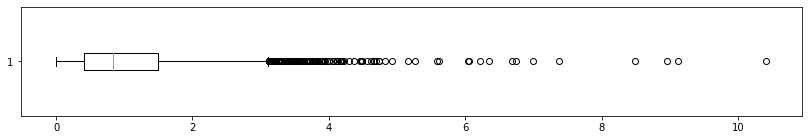

In [13]:
# show boxplot
plt.figure(figsize = (14,2))
plt.boxplot(difference, vert= False);
print('Mean Absolute Error = ', np.mean(difference))

### Trova numero ottimale di nodi 

number of nodes=100: 0.000
number of nodes=200: 0.000
number of nodes=400: 0.000
number of nodes=600: 0.000
number of nodes=900: 0.000


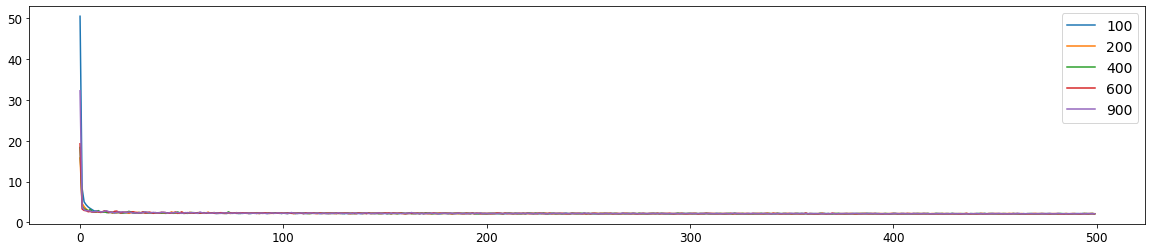

In [29]:
# fit model with given number of nodes, returns test set accuracy
def evaluate_model(n_nodes, train_X, train_y, val_X, val_y):
    
    # define model
    model = Sequential()
    model.add(Dense(n_nodes, activation='relu', input_dim=n_steps)) 
    model.add(Dense(1))

    model.compile(loss='mse',optimizer='adam', metrics=[metrics.mae, 'accuracy'])

    history = model.fit(train_X, train_y, epochs=500, verbose=0)
    unk1, unk2, test_acc = model.evaluate(val_X, val_y, verbose=0)
    return history, test_acc  

plt.figure(figsize = (20, 4))
num_nodes = [100, 200, 400, 600, 900]
for n_nodes in num_nodes:
    # evaluate model with a given number of nodes
    history, result = evaluate_model(n_nodes, train_X, train_y, test_X, test_y)
    # summarize final test set accuracy
    print('number of nodes=%d: %.3f' % (n_nodes, result))
    
    # plot learning curve 
    plt.plot(history.history['loss'], label=str(n_nodes))

# show the plot+

plt.legend(prop={'size': 14})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Calcola errore per tutte le celle.

486-1252


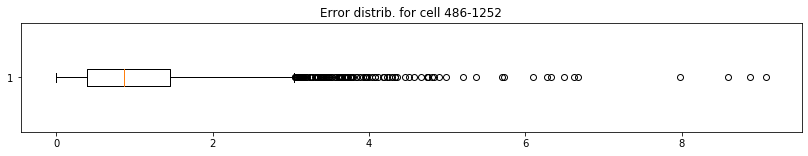

Mean Absolute Error =  1.062986357226167
iteration =  1
486-1253


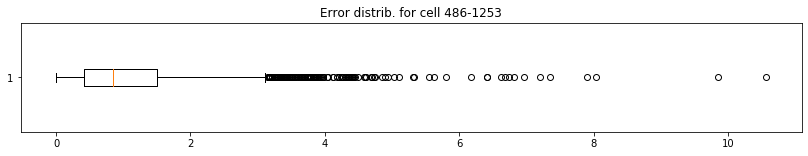

Mean Absolute Error =  1.084928617528914
iteration =  2
486-1254


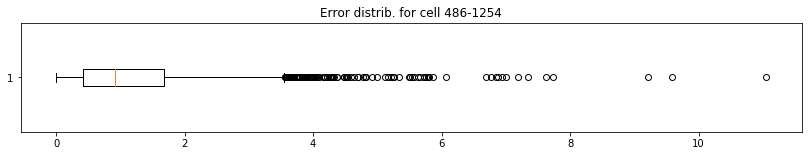

Mean Absolute Error =  1.198249747251048
iteration =  3
486-1255


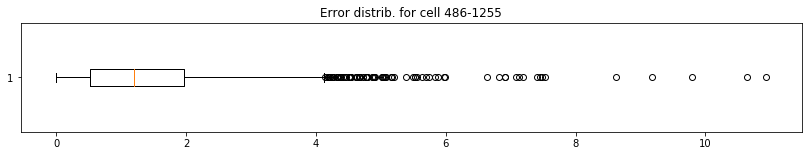

Mean Absolute Error =  1.3943354066400977
iteration =  4
486-1256


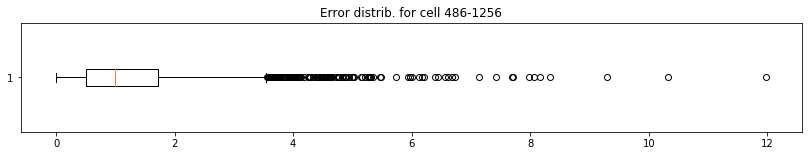

Mean Absolute Error =  1.2603611474050658
iteration =  5
486-1257


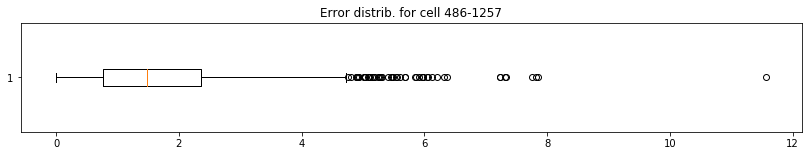

Mean Absolute Error =  1.6654960728451844
iteration =  6
486-1258


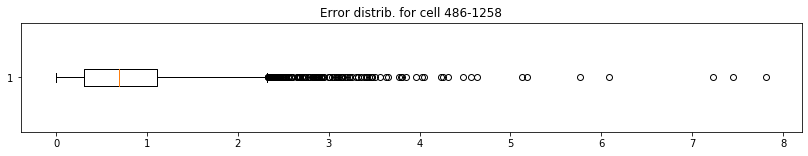

Mean Absolute Error =  0.8251846751936238
iteration =  7
486-1259


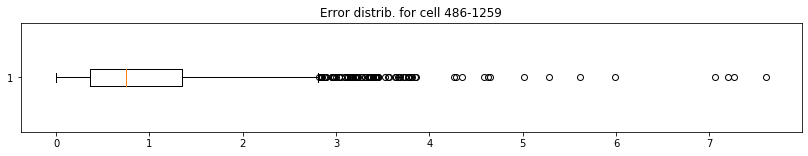

Mean Absolute Error =  0.9353693262964878
iteration =  8
486-1260


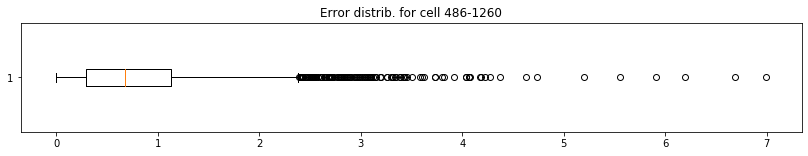

Mean Absolute Error =  0.8257400652963173
iteration =  9
486-1261


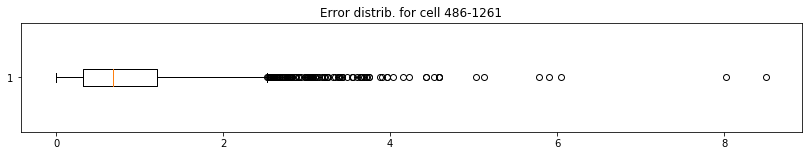

Mean Absolute Error =  0.8590879521231383
iteration =  10
486-1262


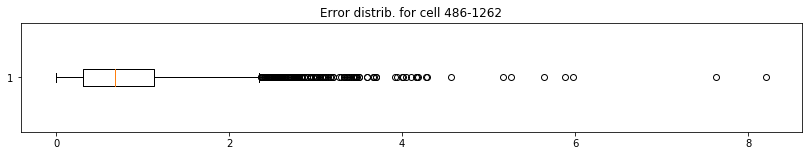

Mean Absolute Error =  0.8368795188419247
iteration =  11
486-1263


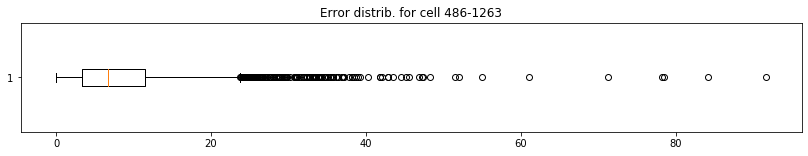

Mean Absolute Error =  8.570828677879014
iteration =  12
486-1264


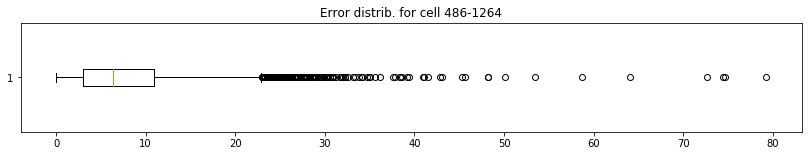

Mean Absolute Error =  8.104590006186069
iteration =  13
486-1265


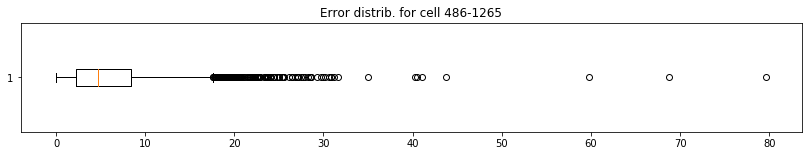

Mean Absolute Error =  6.1093589368777526
iteration =  14
486-1266


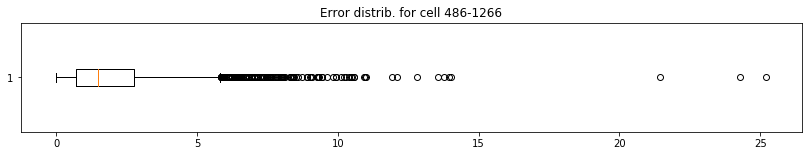

Mean Absolute Error =  2.0257908298044165
iteration =  15
486-1267


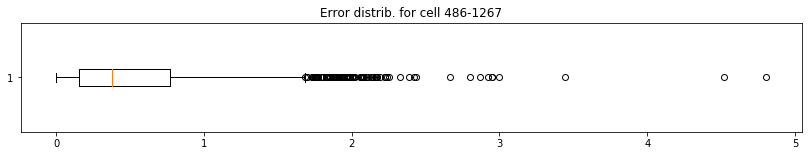

Mean Absolute Error =  0.5064055035003324
iteration =  16
486-1268


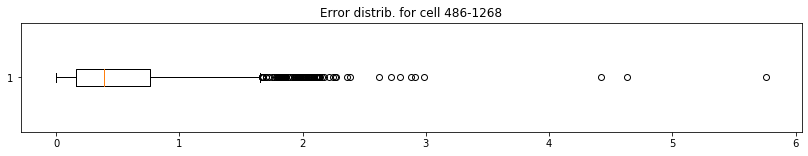

Mean Absolute Error =  0.5121741379462958
iteration =  17
487-1252


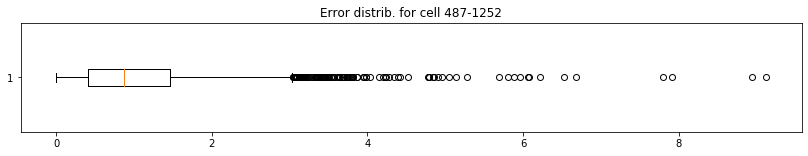

Mean Absolute Error =  1.0602286538172885
iteration =  18
487-1253


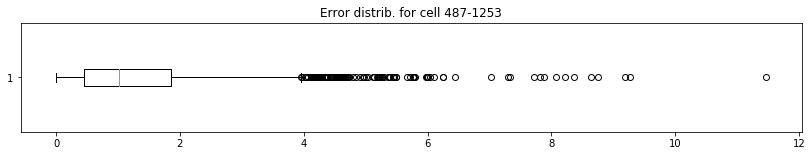

Mean Absolute Error =  1.3015026593766197
iteration =  19
487-1254


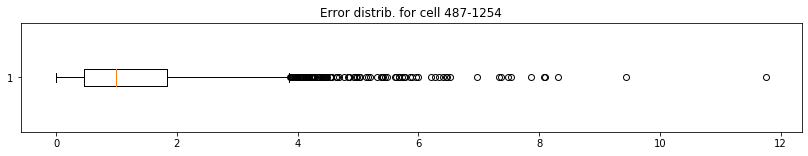

Mean Absolute Error =  1.2793834389068377
iteration =  20
487-1255


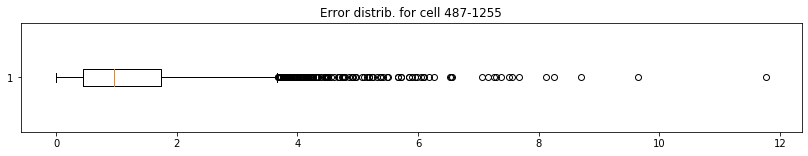

Mean Absolute Error =  1.2518212016059795
iteration =  21
487-1256


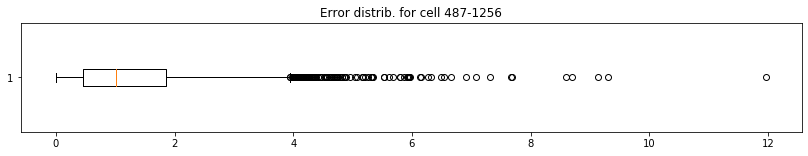

Mean Absolute Error =  1.2946060839824918
iteration =  22
487-1257


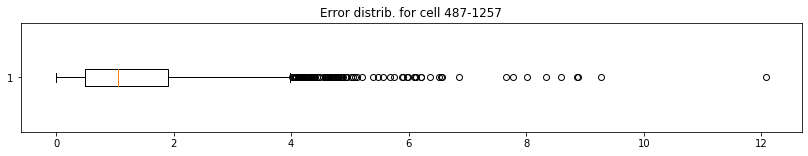

Mean Absolute Error =  1.3209723906395643
iteration =  23
487-1258


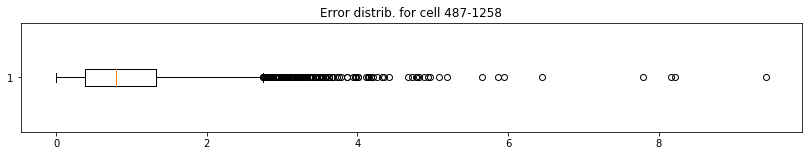

Mean Absolute Error =  0.9736787404153303
iteration =  24
487-1259


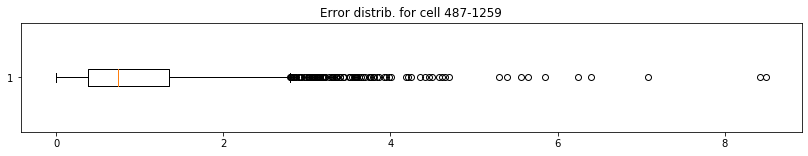

Mean Absolute Error =  0.9438840400654603
iteration =  25
487-1260


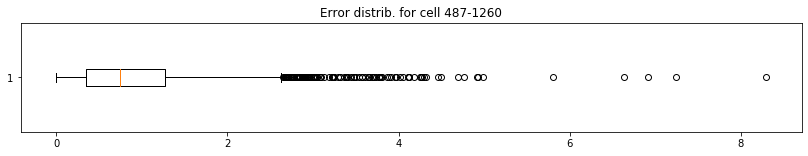

Mean Absolute Error =  0.917408041979789
iteration =  26
487-1261


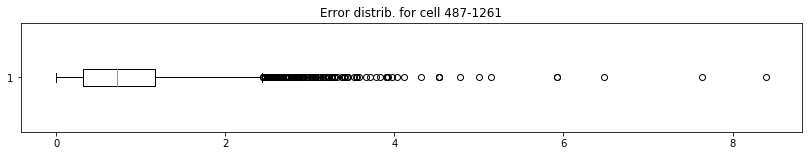

Mean Absolute Error =  0.8655675852258887
iteration =  27
487-1262


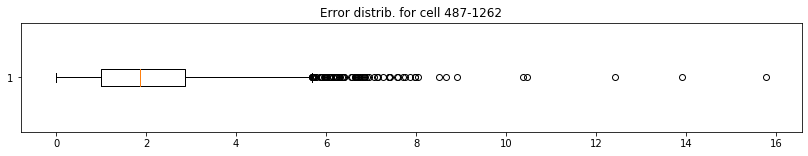

Mean Absolute Error =  2.070096764107172
iteration =  28
487-1263


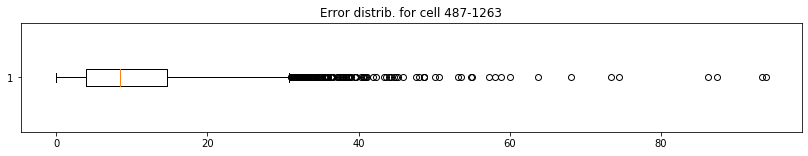

Mean Absolute Error =  10.586957943779732
iteration =  29
487-1264


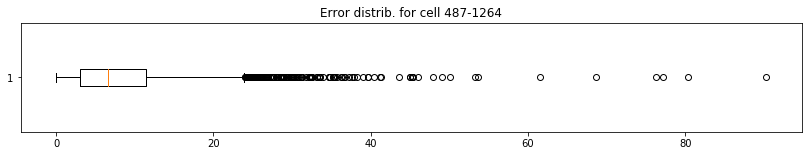

Mean Absolute Error =  8.393295652978553
iteration =  30
487-1265


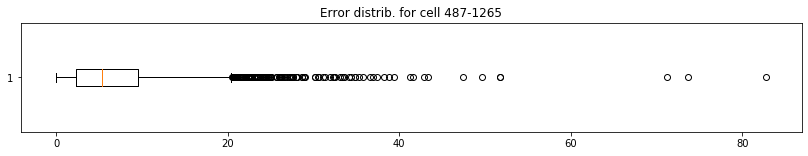

Mean Absolute Error =  6.946672117351474
iteration =  31
487-1266


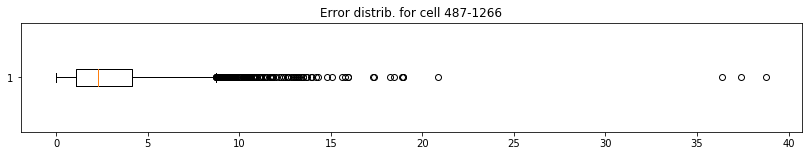

Mean Absolute Error =  3.0310503978537975
iteration =  32
487-1267


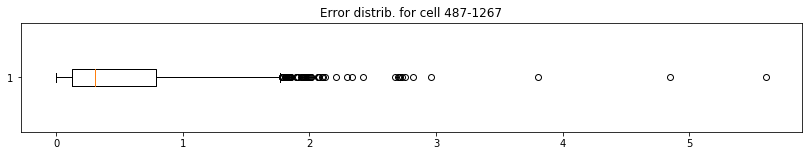

Mean Absolute Error =  0.48155420646167224
iteration =  33
487-1268


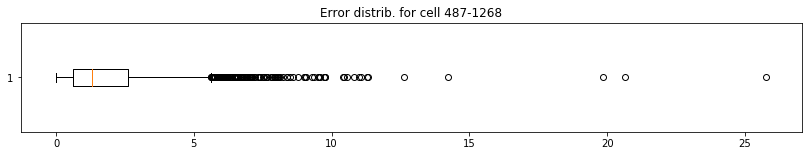

Mean Absolute Error =  1.8475881249409893
iteration =  34
488-1252


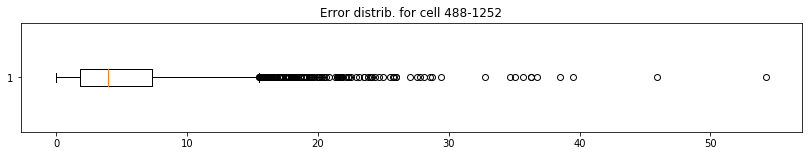

Mean Absolute Error =  5.308166560798109
iteration =  35
488-1253


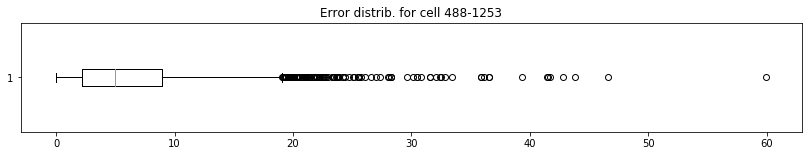

Mean Absolute Error =  6.378390680275346
iteration =  36
488-1254


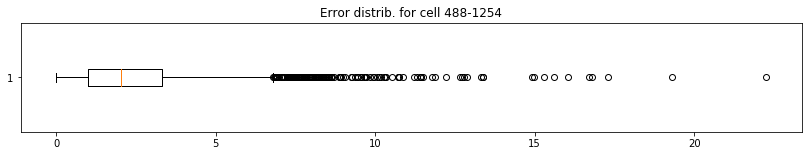

Mean Absolute Error =  2.4756534956022045
iteration =  37
488-1255


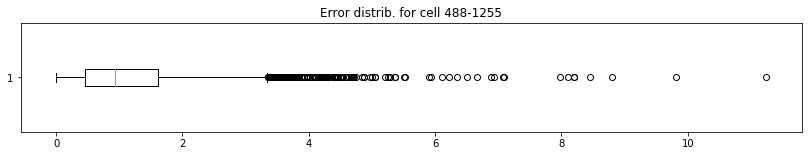

Mean Absolute Error =  1.1961080909664266
iteration =  38
488-1256


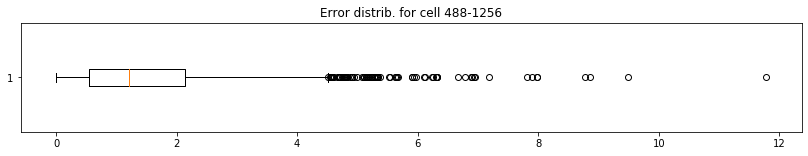

Mean Absolute Error =  1.480485012734203
iteration =  39
488-1257


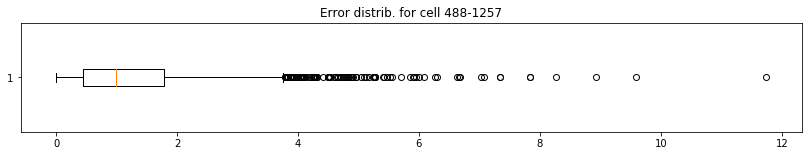

Mean Absolute Error =  1.260996269486992
iteration =  40
488-1258


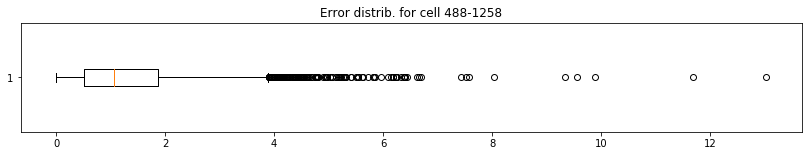

Mean Absolute Error =  1.3491472326167355
iteration =  41
488-1259


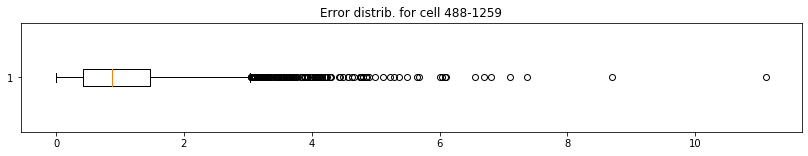

Mean Absolute Error =  1.0810360446261942
iteration =  42
488-1260


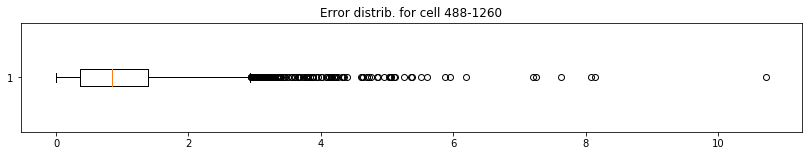

Mean Absolute Error =  1.0314434185896169
iteration =  43
488-1261


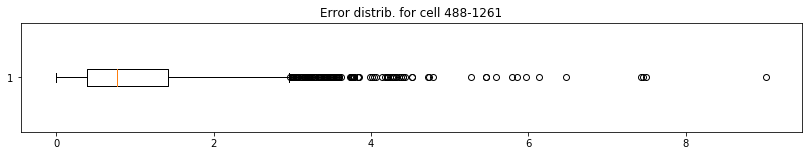

Mean Absolute Error =  1.0094653546702865
iteration =  44
488-1262


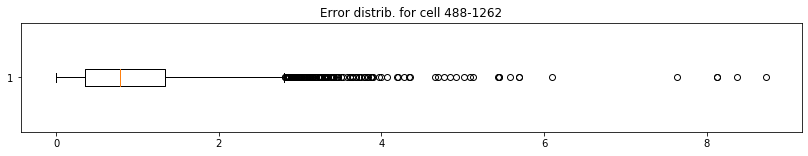

Mean Absolute Error =  0.9713386399300248
iteration =  45
488-1263


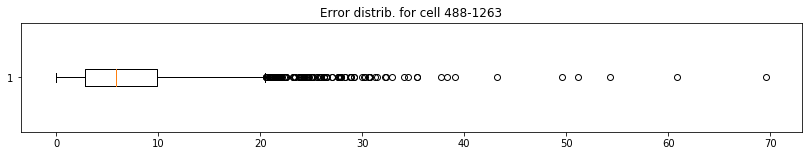

Mean Absolute Error =  7.118093328262607
iteration =  46
488-1264


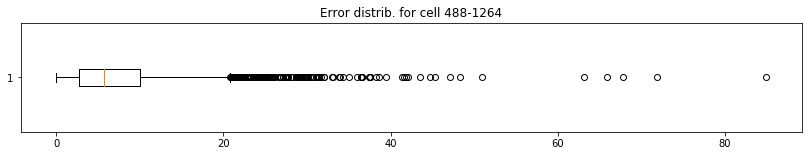

Mean Absolute Error =  7.463716380913112
iteration =  47
488-1265


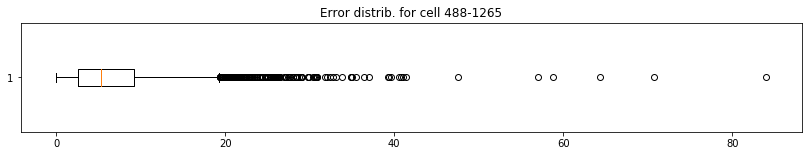

Mean Absolute Error =  6.886162634035651
iteration =  48
488-1266


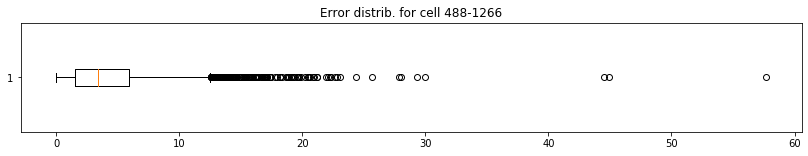

Mean Absolute Error =  4.3660288521611434
iteration =  49
488-1267


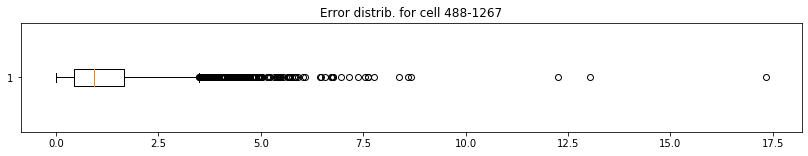

Mean Absolute Error =  1.255645705851101
iteration =  50
488-1268


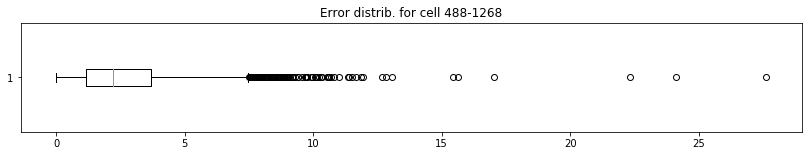

Mean Absolute Error =  2.7075297423578775
iteration =  51
489-1252


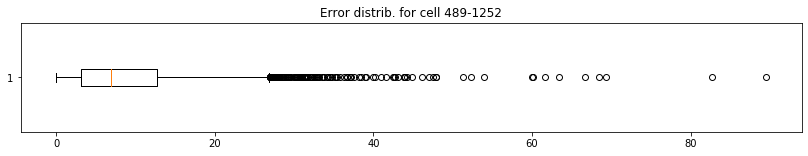

Mean Absolute Error =  9.023086747953965
iteration =  52
489-1253


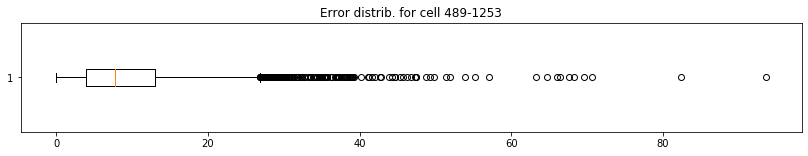

Mean Absolute Error =  9.80679122756091
iteration =  53
489-1254


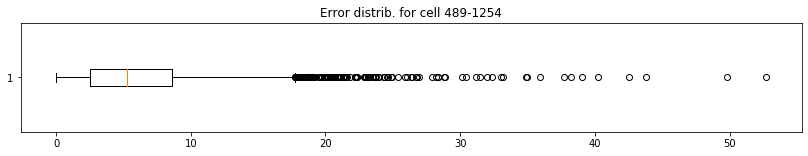

Mean Absolute Error =  6.312541607567142
iteration =  54
489-1255


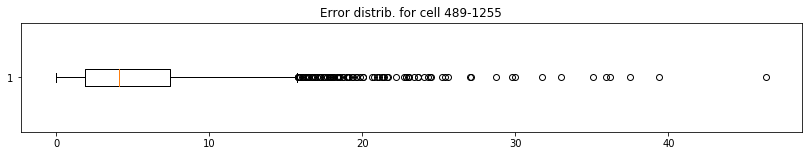

Mean Absolute Error =  5.222949207763985
iteration =  55
489-1256


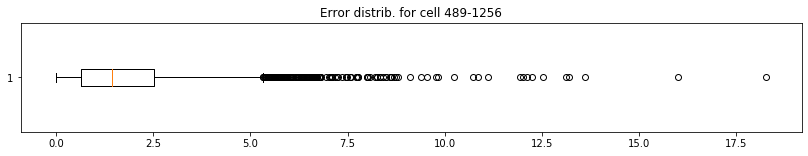

Mean Absolute Error =  1.85370816765116
iteration =  56
489-1257


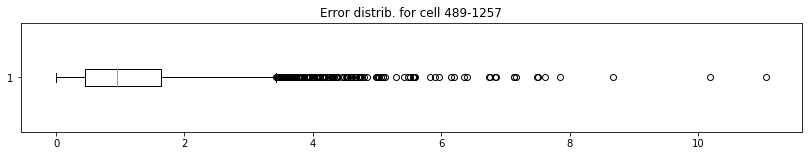

Mean Absolute Error =  1.201182564784212
iteration =  57
489-1258


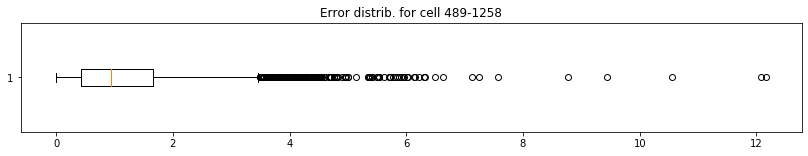

Mean Absolute Error =  1.2289146694066624
iteration =  58
489-1259


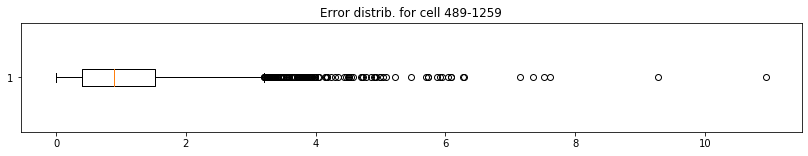

Mean Absolute Error =  1.106274965521179
iteration =  59
489-1260


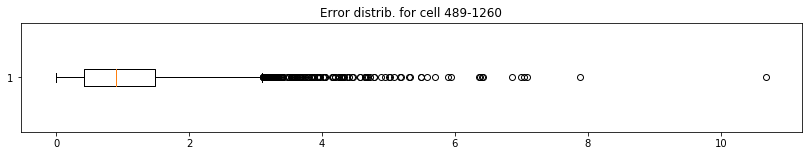

Mean Absolute Error =  1.0999844924561866
iteration =  60
489-1261


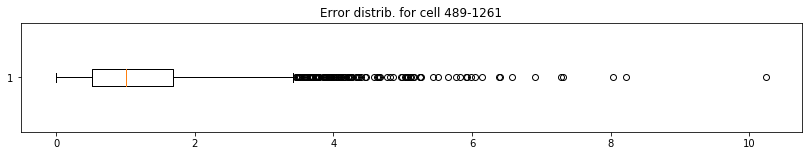

Mean Absolute Error =  1.219601743722152
iteration =  61
489-1262


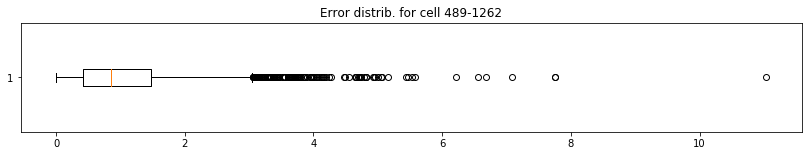

Mean Absolute Error =  1.071574455608467
iteration =  62
489-1263


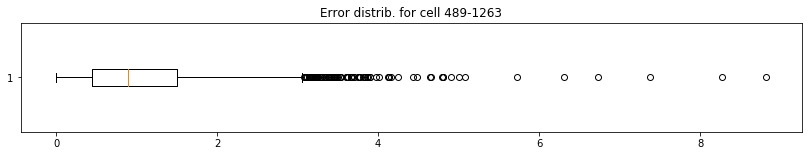

Mean Absolute Error =  1.0620936783397985
iteration =  63
489-1264


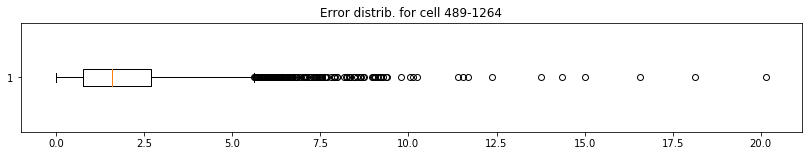

Mean Absolute Error =  1.9875609303967572
iteration =  64
489-1265


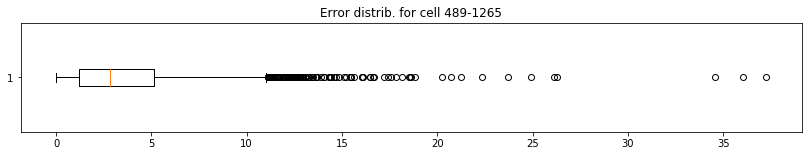

Mean Absolute Error =  3.621333959201333
iteration =  65
489-1266


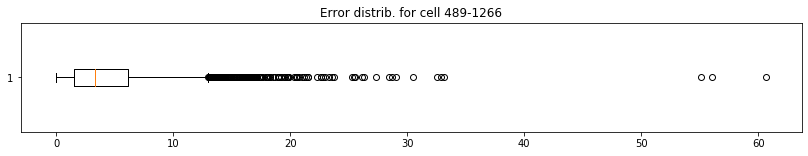

Mean Absolute Error =  4.533622833903267
iteration =  66
489-1267


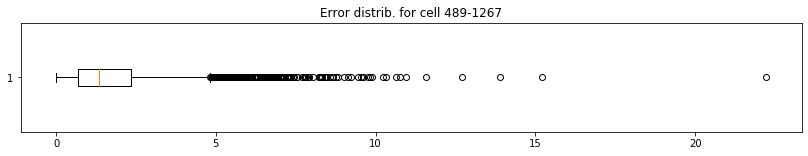

Mean Absolute Error =  1.7972311293076475
iteration =  67
489-1268


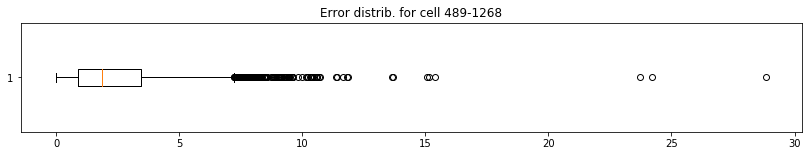

Mean Absolute Error =  2.4460988455488186
iteration =  68
490-1252


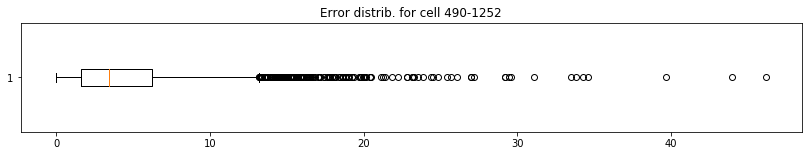

Mean Absolute Error =  4.659671458771309
iteration =  69
490-1253


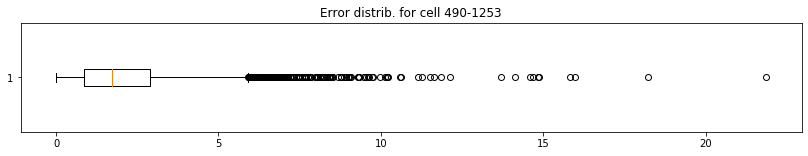

Mean Absolute Error =  2.1694432545762714
iteration =  70
490-1254


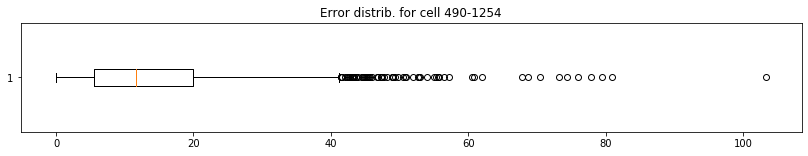

Mean Absolute Error =  13.894046645141193
iteration =  71
490-1255


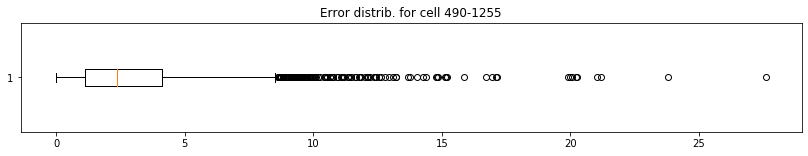

Mean Absolute Error =  2.999255124693145
iteration =  72
490-1256


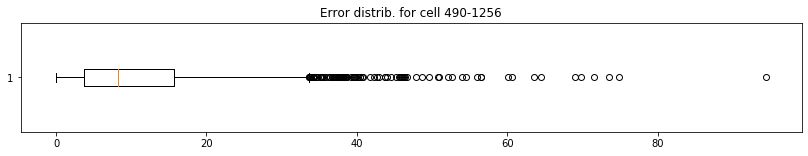

Mean Absolute Error =  10.72977107139503
iteration =  73
490-1257


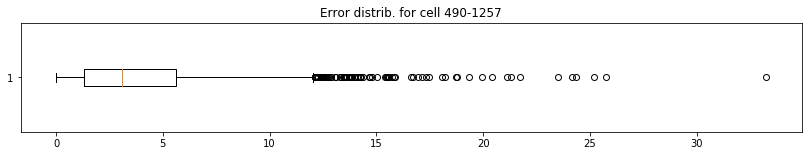

Mean Absolute Error =  3.8559188352326372
iteration =  74
490-1258


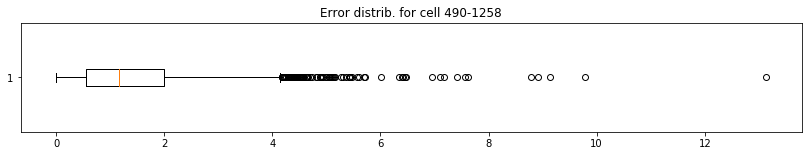

Mean Absolute Error =  1.4038613246565583
iteration =  75
490-1259


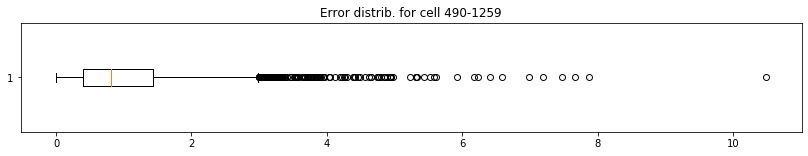

Mean Absolute Error =  1.049432200311419
iteration =  76
490-1260


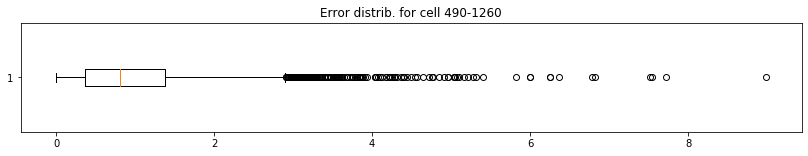

Mean Absolute Error =  1.0129756387998463
iteration =  77
490-1261


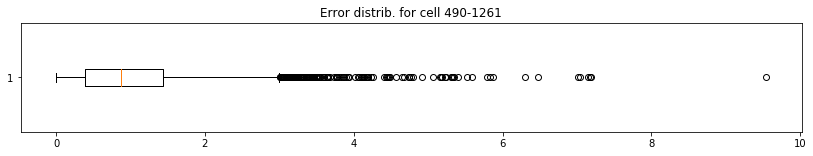

Mean Absolute Error =  1.0582254860510891
iteration =  78
490-1262


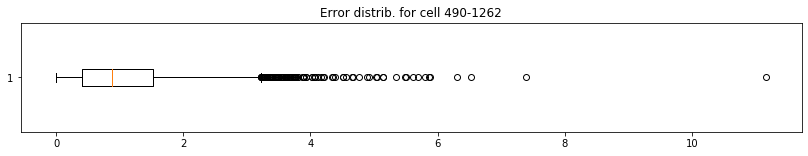

Mean Absolute Error =  1.0793616465781641
iteration =  79
490-1263


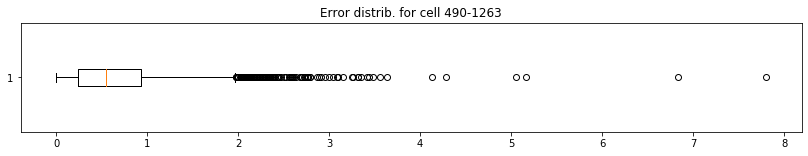

Mean Absolute Error =  0.6667967585678669
iteration =  80
490-1264


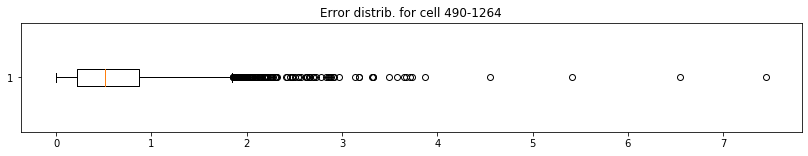

Mean Absolute Error =  0.6284187976055385
iteration =  81
490-1265


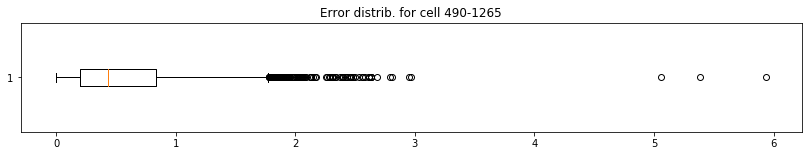

Mean Absolute Error =  0.5729544019907536
iteration =  82
490-1266


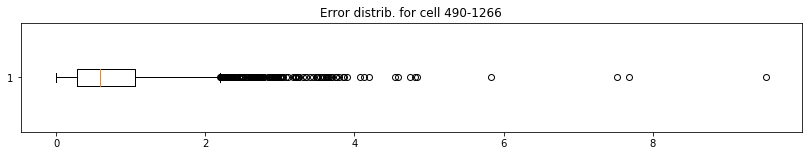

Mean Absolute Error =  0.7782049824015038
iteration =  83
490-1267


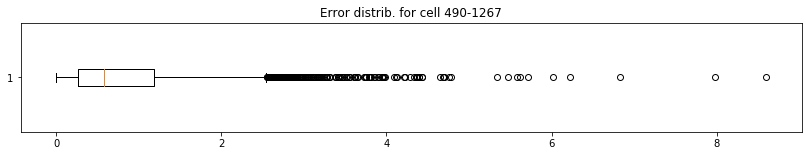

Mean Absolute Error =  0.8516147002428348
iteration =  84
490-1268


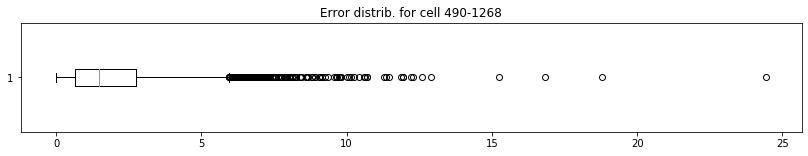

Mean Absolute Error =  2.0298545800128367
iteration =  85
491-1252


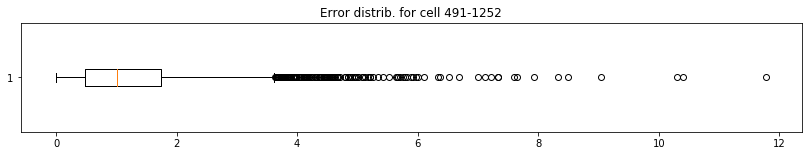

Mean Absolute Error =  1.2770512694410077
iteration =  86
491-1253


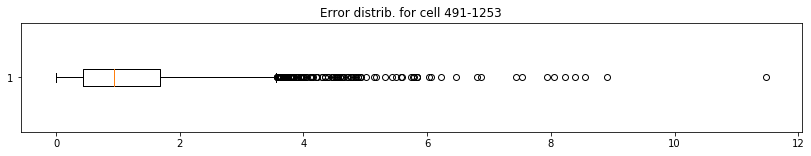

Mean Absolute Error =  1.1994838199630191
iteration =  87
491-1254


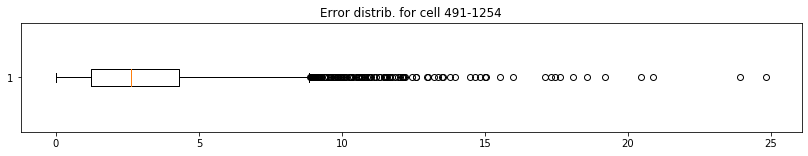

Mean Absolute Error =  3.1165285775029403
iteration =  88
491-1255


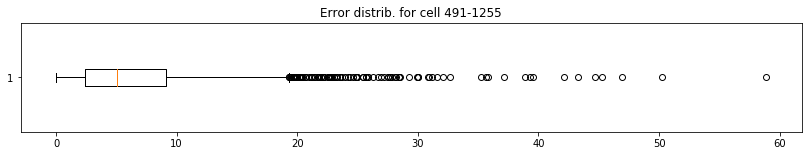

Mean Absolute Error =  6.509831599939081
iteration =  89
491-1256


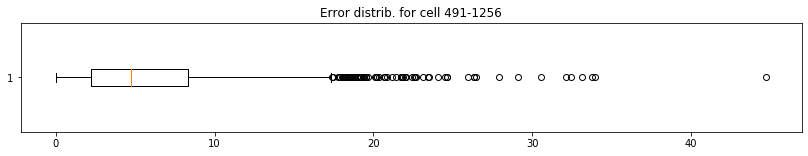

Mean Absolute Error =  5.795582681794681
iteration =  90
491-1257


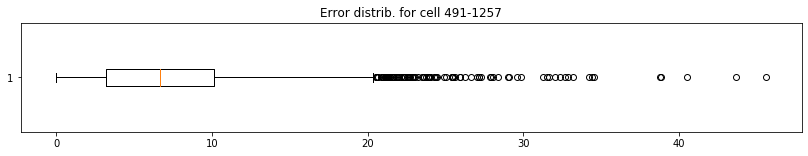

Mean Absolute Error =  7.360569676080195
iteration =  91
491-1258


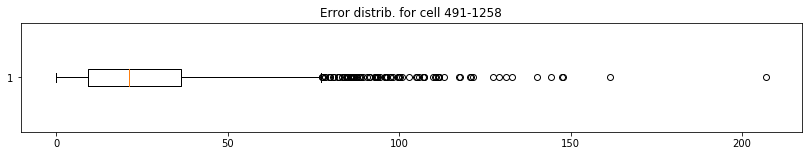

Mean Absolute Error =  25.546593632481038
iteration =  92
491-1259


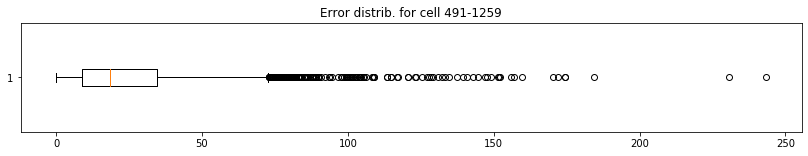

Mean Absolute Error =  25.22173129037831
iteration =  93
491-1260


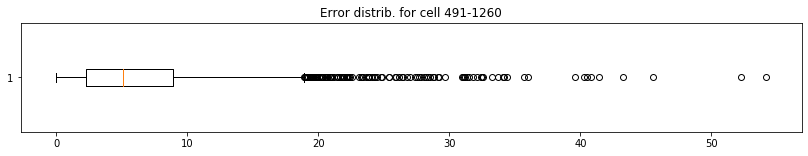

Mean Absolute Error =  6.4329179139454835
iteration =  94
491-1261


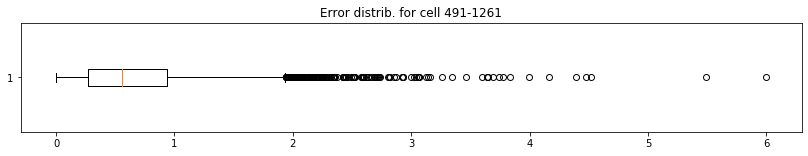

Mean Absolute Error =  0.6944146135467035
iteration =  95
491-1262


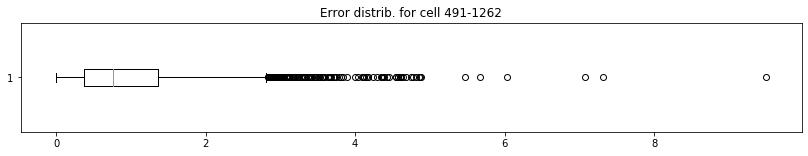

Mean Absolute Error =  0.970461816706796
iteration =  96
491-1263


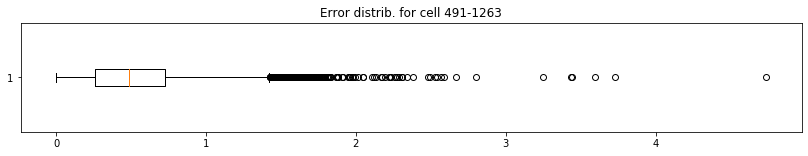

Mean Absolute Error =  0.5704931645137113
iteration =  97
491-1264


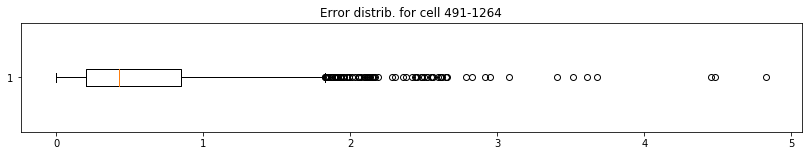

Mean Absolute Error =  0.5802109679822659
iteration =  98
491-1265


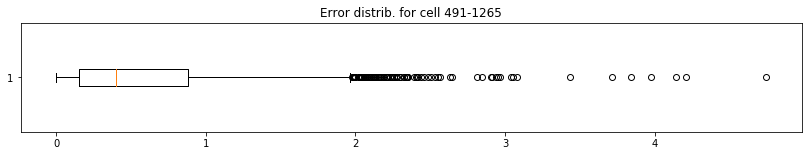

Mean Absolute Error =  0.5732577371241716
iteration =  99
491-1266


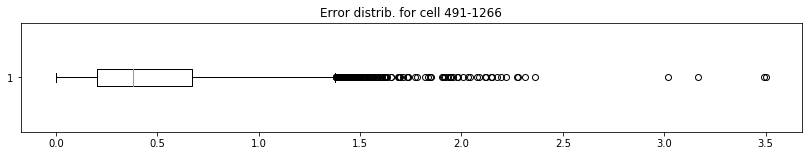

Mean Absolute Error =  0.5013505730171626
iteration =  100
491-1267


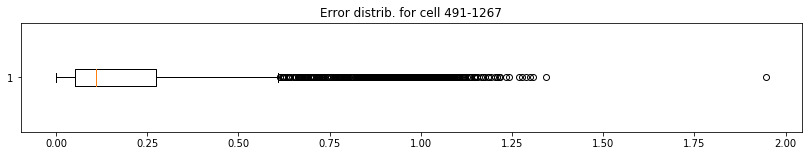

Mean Absolute Error =  0.2453012167257955
iteration =  101
491-1268


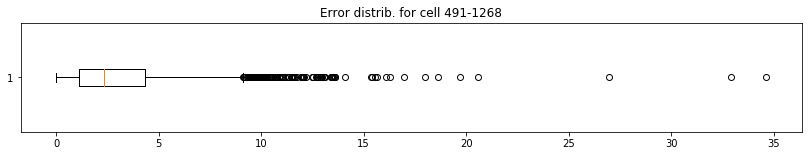

Mean Absolute Error =  3.08833515837187
iteration =  102
492-1252


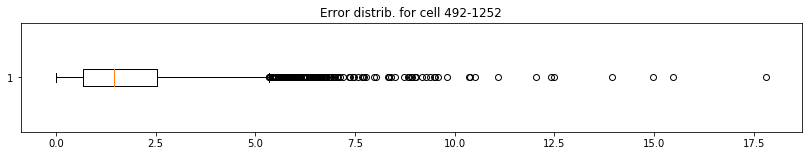

Mean Absolute Error =  1.8552434719690905
iteration =  103
492-1253


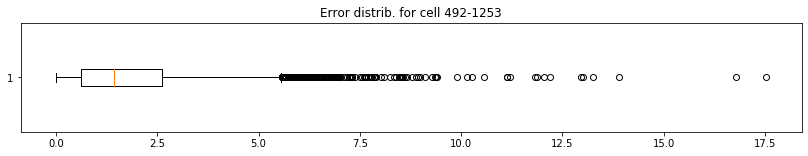

Mean Absolute Error =  1.9076236716025468
iteration =  104
492-1254


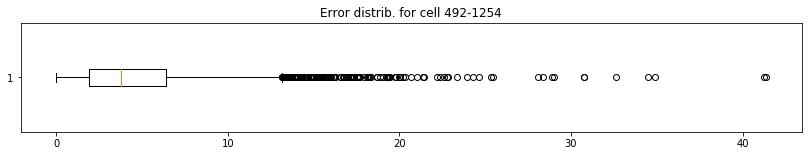

Mean Absolute Error =  4.729074711111769
iteration =  105
492-1255


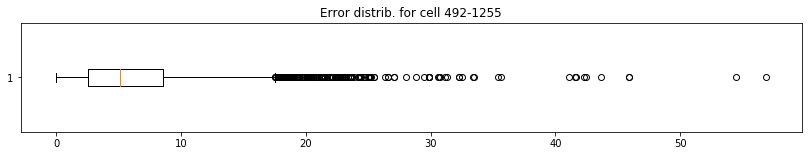

Mean Absolute Error =  6.421842655997008
iteration =  106
492-1256


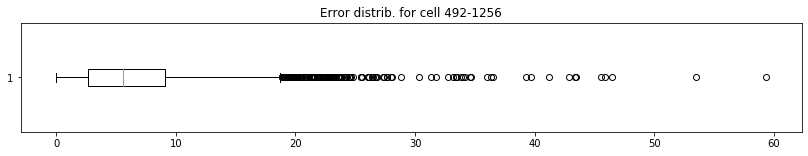

Mean Absolute Error =  6.795405624519127
iteration =  107
492-1257


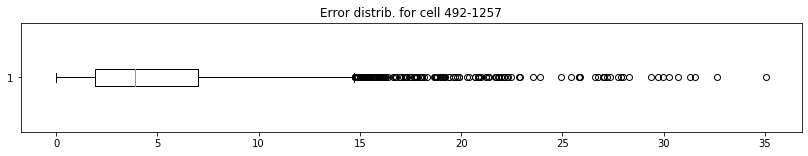

Mean Absolute Error =  5.0588919025792904
iteration =  108
492-1258


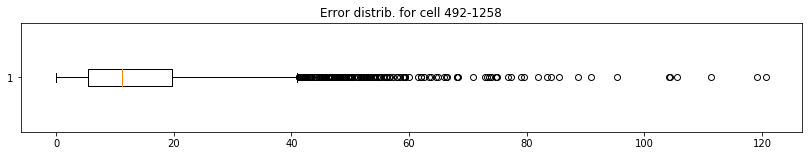

Mean Absolute Error =  14.743224587591303
iteration =  109
492-1259


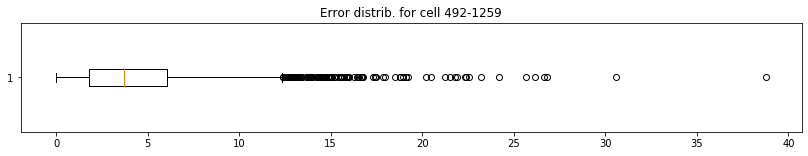

Mean Absolute Error =  4.418583998185989
iteration =  110
492-1260


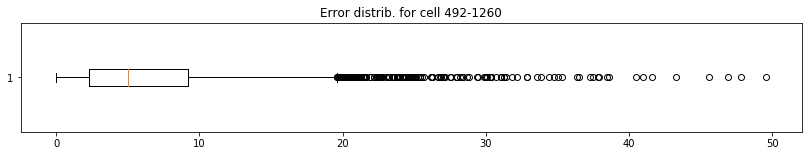

Mean Absolute Error =  6.750985092355341
iteration =  111
492-1261


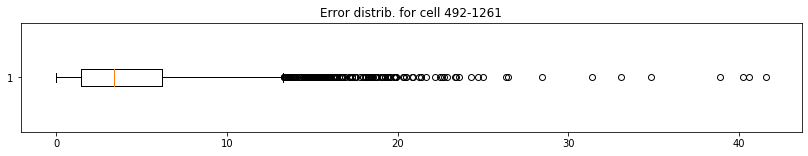

Mean Absolute Error =  4.56910649655441
iteration =  112
492-1262


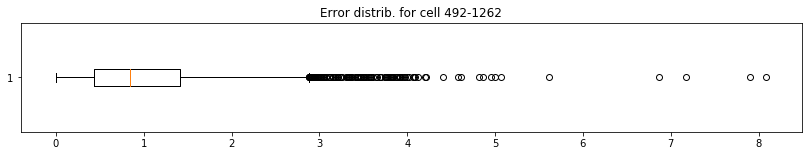

Mean Absolute Error =  1.0270393579531587
iteration =  113
492-1263


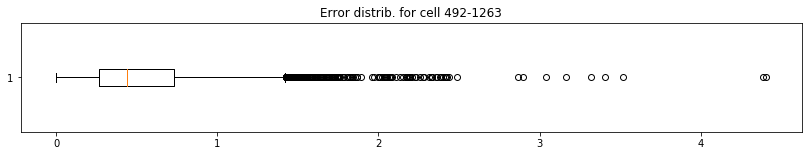

Mean Absolute Error =  0.5769655669553938
iteration =  114
492-1264


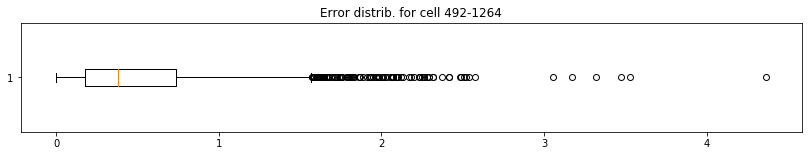

Mean Absolute Error =  0.5162417089825702
iteration =  115
492-1265


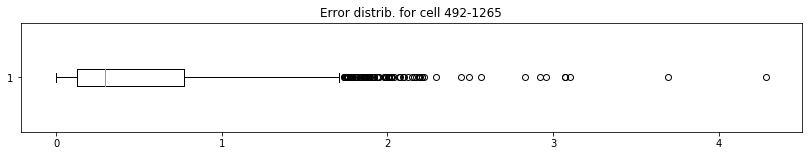

Mean Absolute Error =  0.4754751925911073
iteration =  116
492-1266


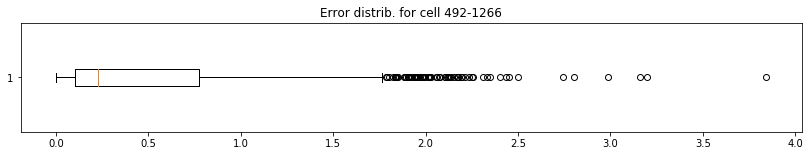

Mean Absolute Error =  0.4351963407124612
iteration =  117
492-1267


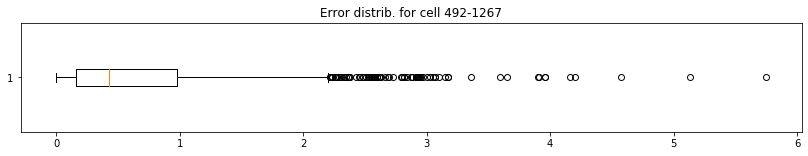

Mean Absolute Error =  0.6380878319989197
iteration =  118
492-1268


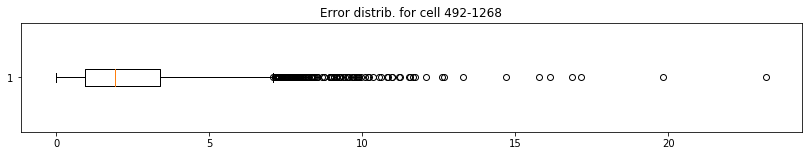

Mean Absolute Error =  2.4567619945617345
iteration =  119
493-1252


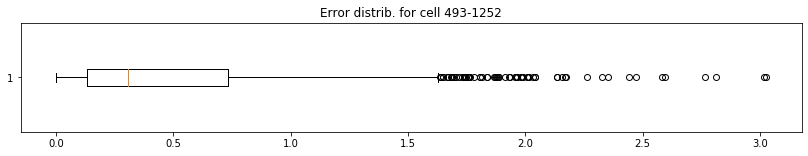

Mean Absolute Error =  0.46355755281926553
iteration =  120
493-1253


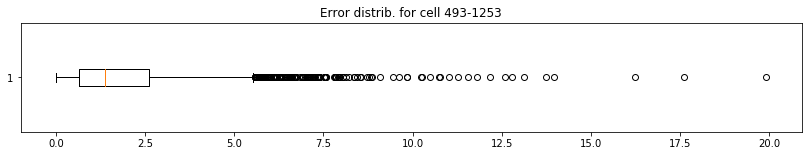

Mean Absolute Error =  1.8746889565100735
iteration =  121
493-1254


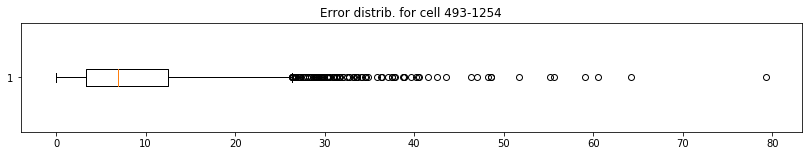

Mean Absolute Error =  8.769598759057498
iteration =  122
493-1255


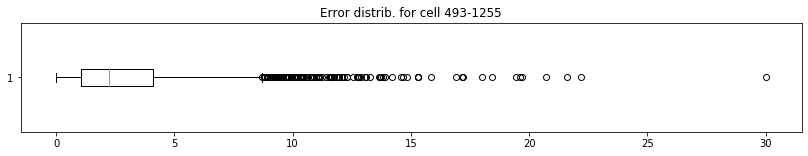

Mean Absolute Error =  2.9251594602310678
iteration =  123
493-1256


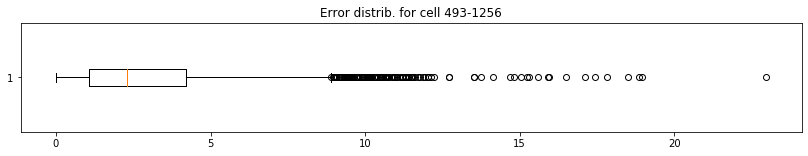

Mean Absolute Error =  2.9488780835073936
iteration =  124
493-1257


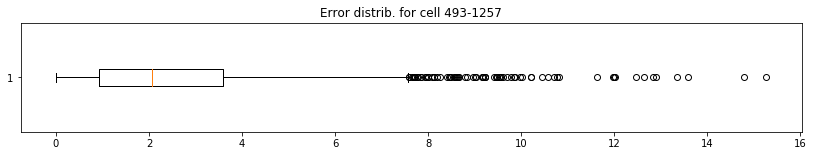

Mean Absolute Error =  2.502573218802984
iteration =  125
493-1258


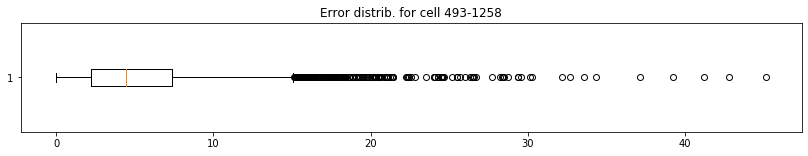

Mean Absolute Error =  5.6304737619766385
iteration =  126
493-1259


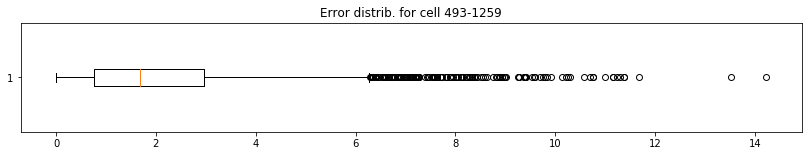

Mean Absolute Error =  2.1734971320852887
iteration =  127
493-1260


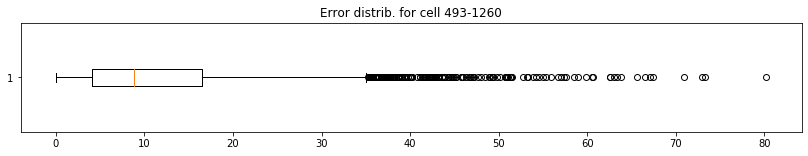

Mean Absolute Error =  11.931646557447689
iteration =  128
493-1261


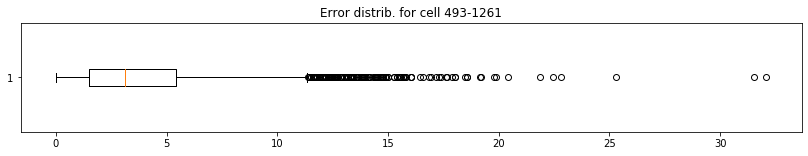

Mean Absolute Error =  3.954175959396068
iteration =  129
493-1262


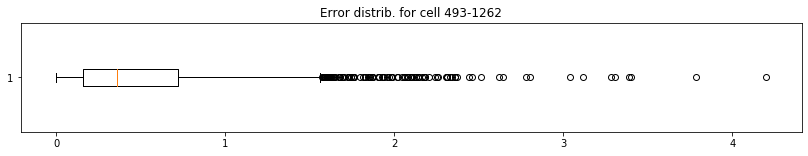

Mean Absolute Error =  0.5029372011490241
iteration =  130
493-1263


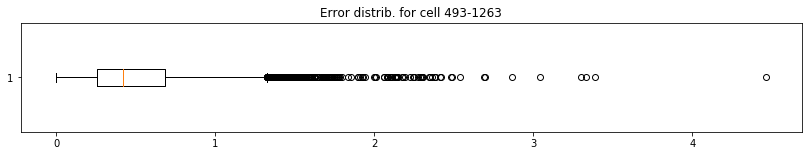

Mean Absolute Error =  0.5515206067964883
iteration =  131
493-1264


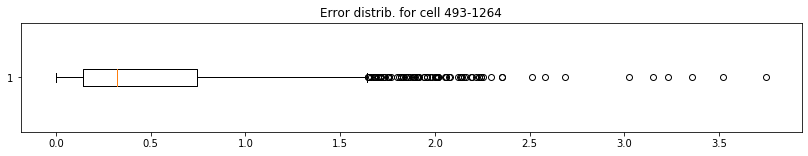

Mean Absolute Error =  0.48371386411533956
iteration =  132
493-1265


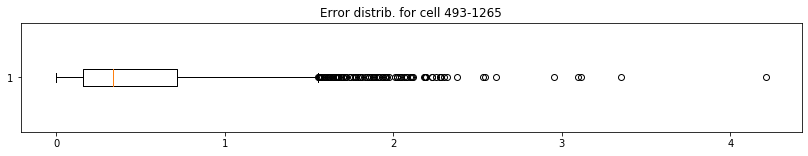

Mean Absolute Error =  0.4896895557481055
iteration =  133
493-1266


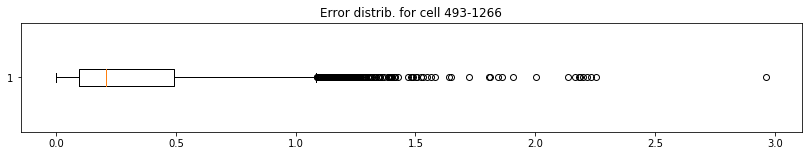

Mean Absolute Error =  0.35964869496509083
iteration =  134
493-1267


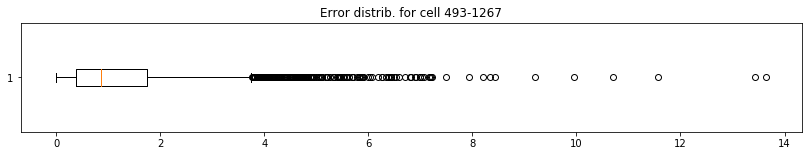

Mean Absolute Error =  1.2803296025169022
iteration =  135
493-1268


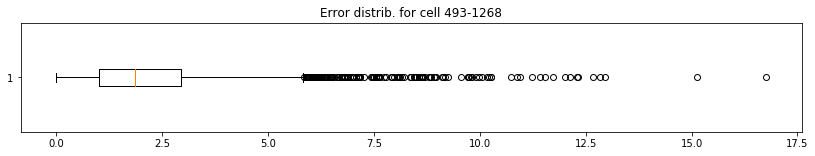

Mean Absolute Error =  2.2261483292249826
iteration =  136
494-1252


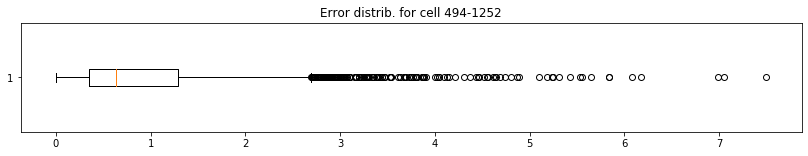

Mean Absolute Error =  0.9198580560662134
iteration =  137
494-1253


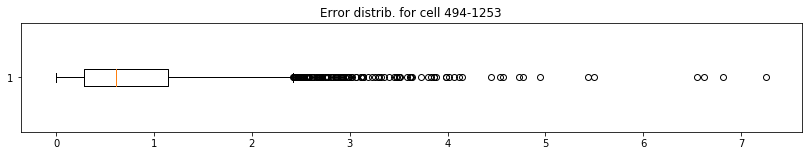

Mean Absolute Error =  0.8091325105140864
iteration =  138
494-1254


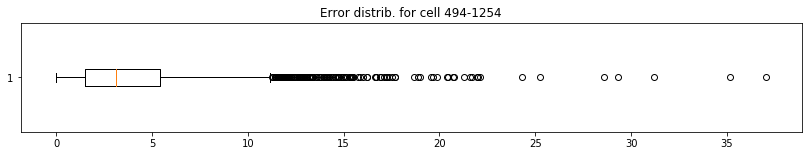

Mean Absolute Error =  3.980355468498891
iteration =  139
494-1255


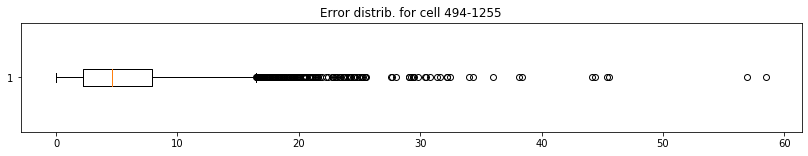

Mean Absolute Error =  5.937575450376362
iteration =  140
494-1256


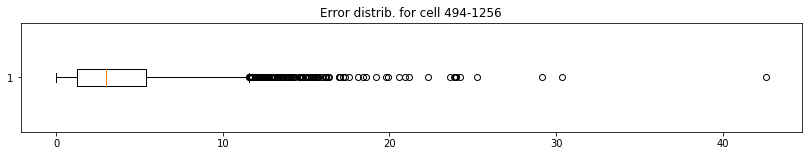

Mean Absolute Error =  3.810396478426858
iteration =  141
494-1257


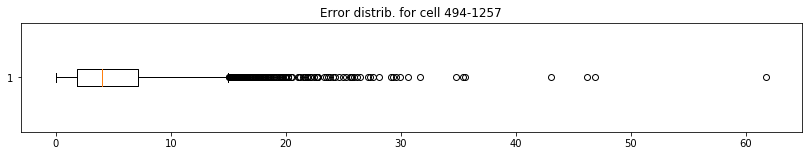

Mean Absolute Error =  5.250892429248813
iteration =  142
494-1258


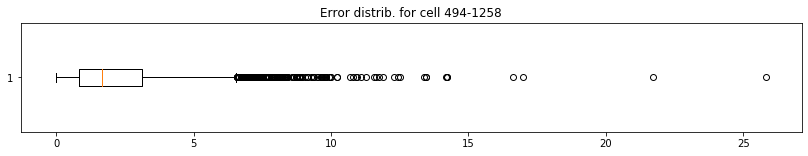

Mean Absolute Error =  2.2837221729752337
iteration =  143
494-1259


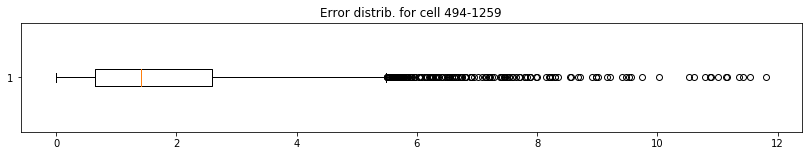

Mean Absolute Error =  1.8800994174650256
iteration =  144
494-1260


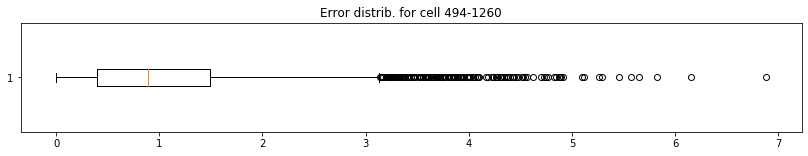

Mean Absolute Error =  1.0925456601508512
iteration =  145
494-1261


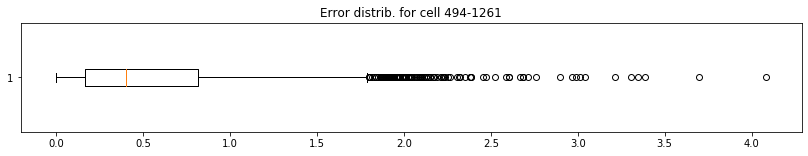

Mean Absolute Error =  0.5478308241911123
iteration =  146
494-1262


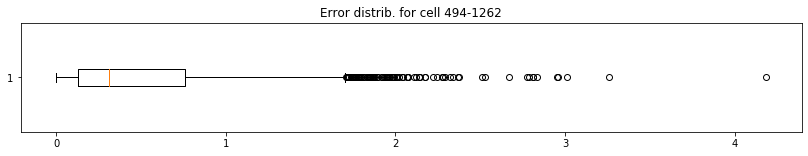

Mean Absolute Error =  0.4774246448782668
iteration =  147
494-1263


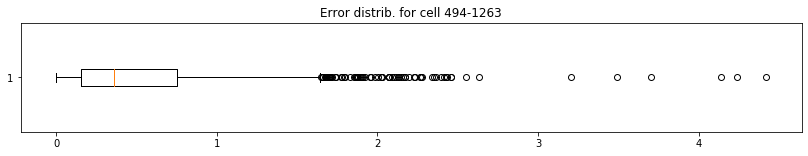

Mean Absolute Error =  0.5000903013586906
iteration =  148
494-1264


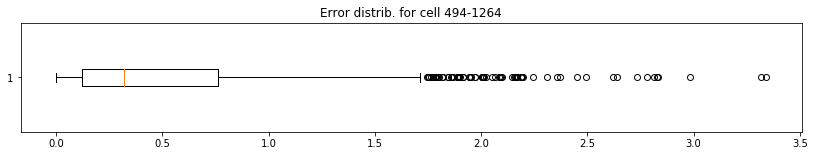

Mean Absolute Error =  0.478018826891506
iteration =  149
494-1265


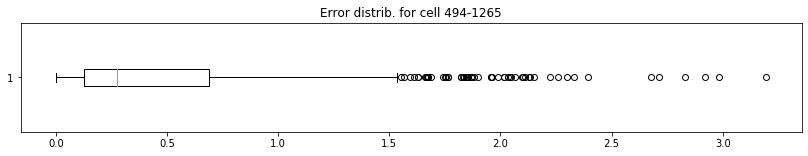

Mean Absolute Error =  0.43565391433609885
iteration =  150
494-1266


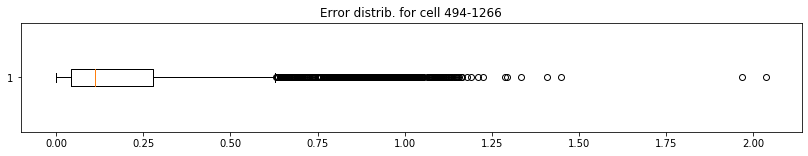

Mean Absolute Error =  0.2429953842673151
iteration =  151
494-1267


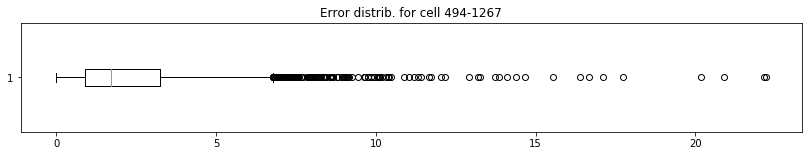

Mean Absolute Error =  2.3619246596878063
iteration =  152
494-1268


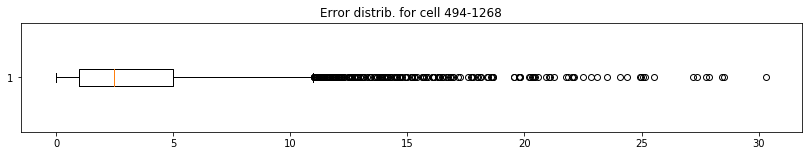

Mean Absolute Error =  3.6768858231073422
iteration =  153
495-1252


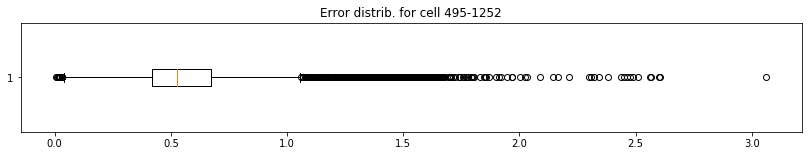

Mean Absolute Error =  0.6233037000574223
iteration =  154
495-1253


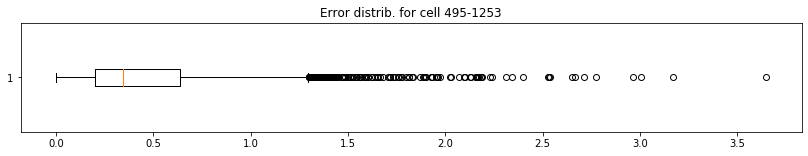

Mean Absolute Error =  0.48045630931976857
iteration =  155
495-1254


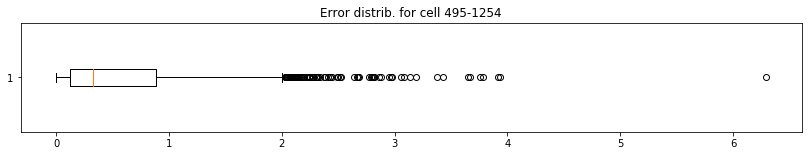

Mean Absolute Error =  0.5473698179284722
iteration =  156
495-1255


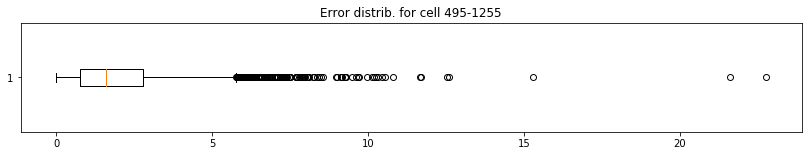

Mean Absolute Error =  2.0389998856042033
iteration =  157
495-1256


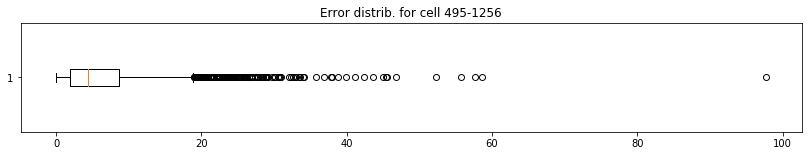

Mean Absolute Error =  6.376203768968766
iteration =  158
495-1257


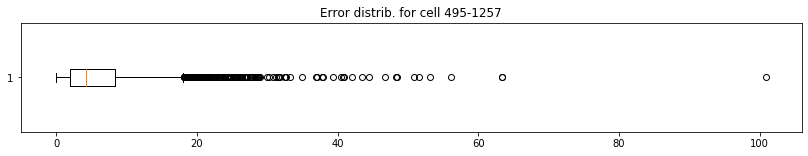

Mean Absolute Error =  6.235162489271373
iteration =  159
495-1258


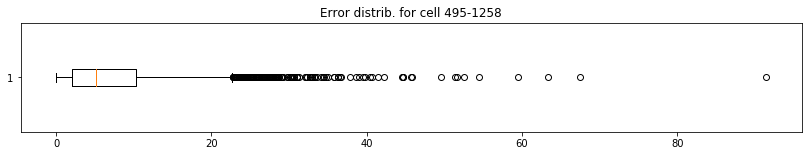

Mean Absolute Error =  7.320360414716387
iteration =  160
495-1259


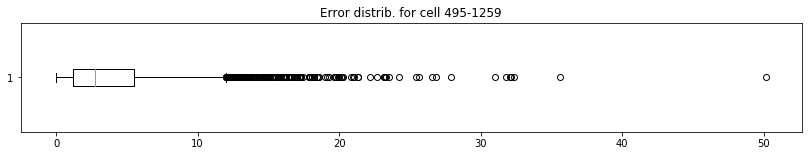

Mean Absolute Error =  4.0399140181165025
iteration =  161
495-1260


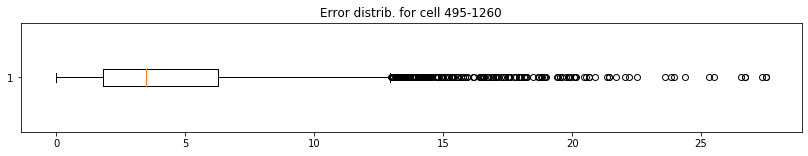

Mean Absolute Error =  4.628315190663219
iteration =  162
495-1261


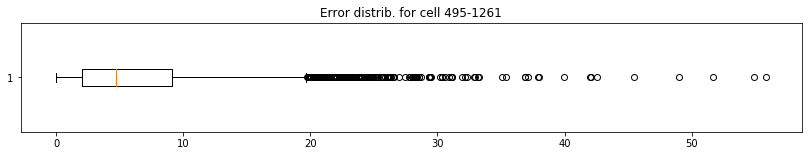

Mean Absolute Error =  6.66044653580838
iteration =  163
495-1262


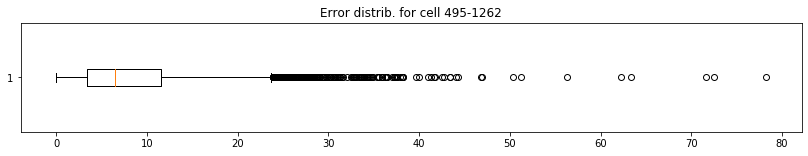

Mean Absolute Error =  8.6258887057747
iteration =  164
495-1263


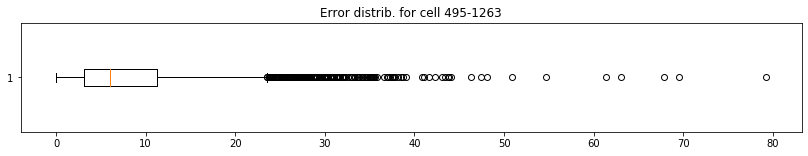

Mean Absolute Error =  8.29106701600518
iteration =  165
495-1264


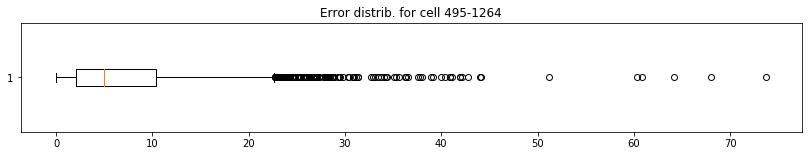

Mean Absolute Error =  7.256779806814392
iteration =  166
495-1265


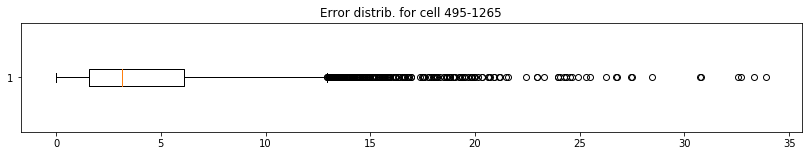

Mean Absolute Error =  4.5769952061428265
iteration =  167
495-1266


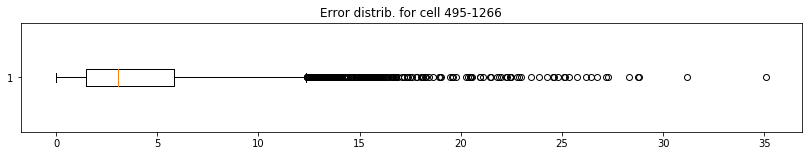

Mean Absolute Error =  4.385629780956454
iteration =  168
495-1267


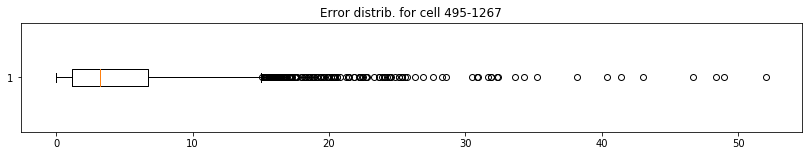

Mean Absolute Error =  4.825828369799786
iteration =  169
495-1268


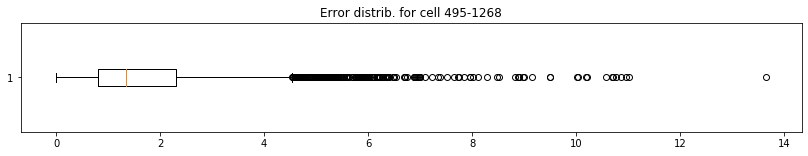

Mean Absolute Error =  1.7683470773341325
iteration =  170
496-1252


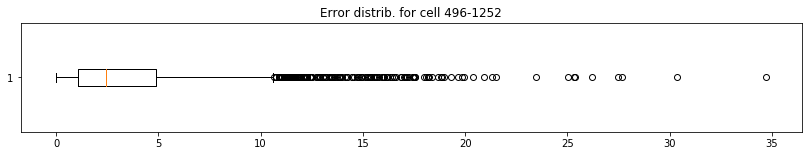

Mean Absolute Error =  3.549439520233853
iteration =  171
496-1253


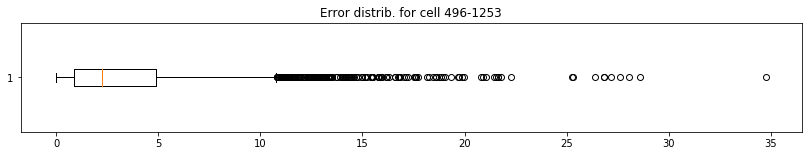

Mean Absolute Error =  3.492280830114536
iteration =  172
496-1254


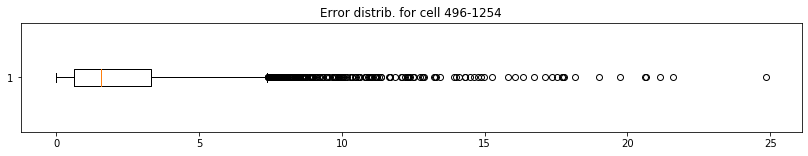

Mean Absolute Error =  2.4222928805166113
iteration =  173
496-1255


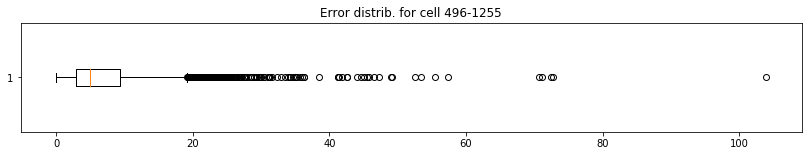

Mean Absolute Error =  7.117025613233037
iteration =  174
496-1256


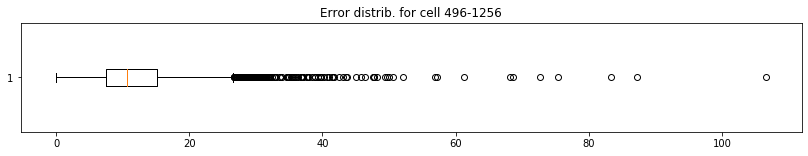

Mean Absolute Error =  11.949916691484596
iteration =  175
496-1257


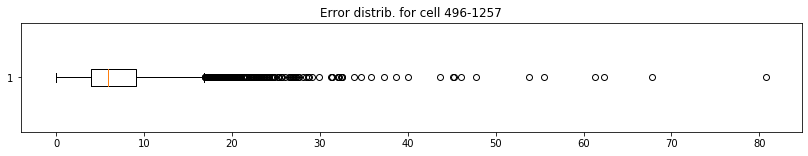

Mean Absolute Error =  7.182394387207659
iteration =  176
496-1258


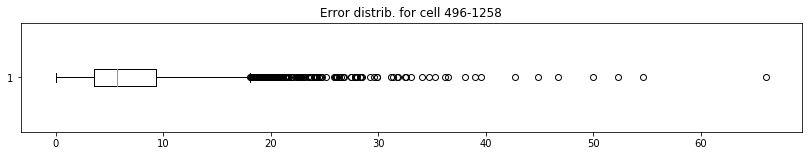

Mean Absolute Error =  7.042028696379462
iteration =  177
496-1259


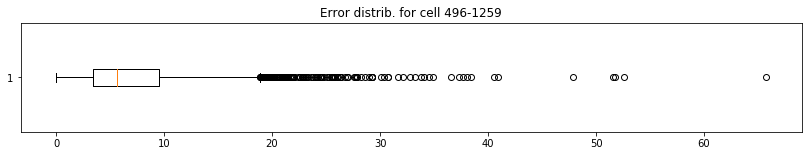

Mean Absolute Error =  7.1248544745471
iteration =  178
496-1260


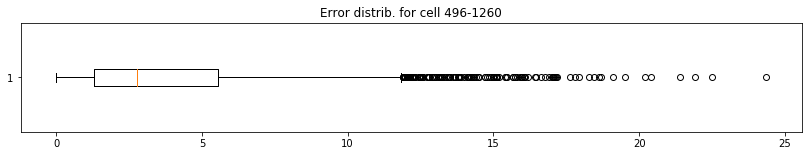

Mean Absolute Error =  3.8570730847422214
iteration =  179
496-1261


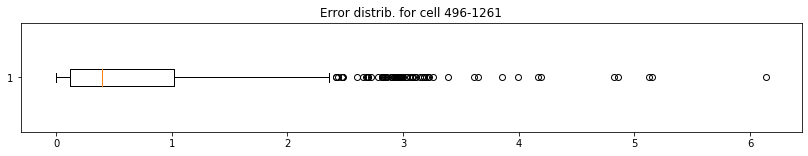

Mean Absolute Error =  0.6615515419804795
iteration =  180
496-1262


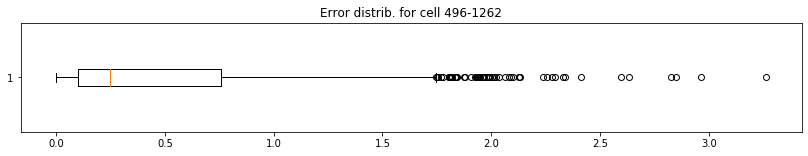

Mean Absolute Error =  0.4304906798990749
iteration =  181
496-1263


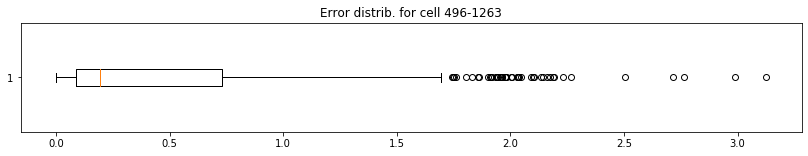

Mean Absolute Error =  0.3886330916722779
iteration =  182
496-1264


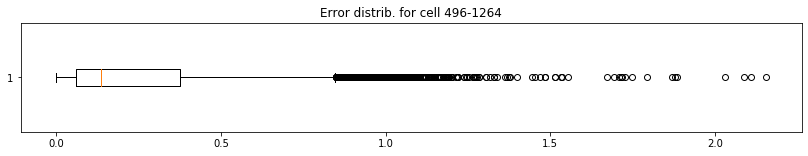

Mean Absolute Error =  0.29710580021962923
iteration =  183
496-1265


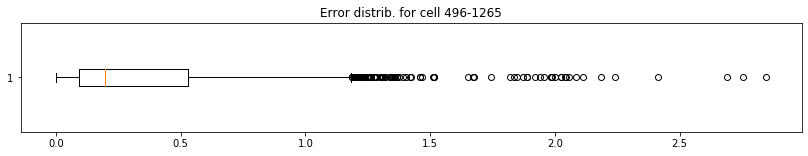

Mean Absolute Error =  0.3611833256539786
iteration =  184
496-1266


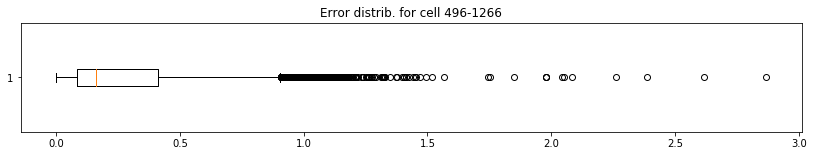

Mean Absolute Error =  0.320083362641142
iteration =  185
496-1267


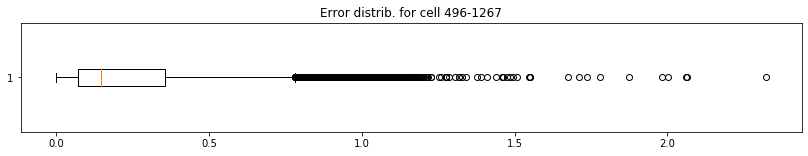

Mean Absolute Error =  0.2912042330395872
iteration =  186
496-1268


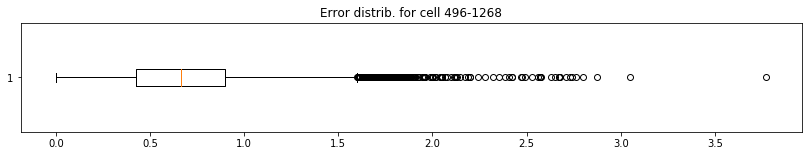

Mean Absolute Error =  0.7429462176847961
iteration =  187
497-1252


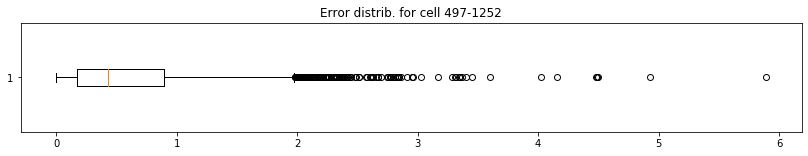

Mean Absolute Error =  0.6056145599121973
iteration =  188
497-1253


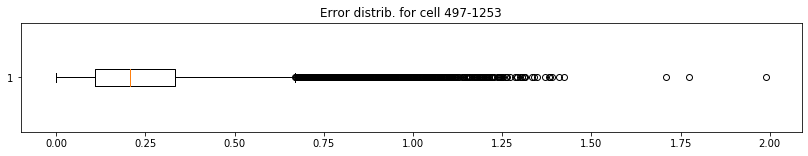

Mean Absolute Error =  0.29716706980957597
iteration =  189
497-1254


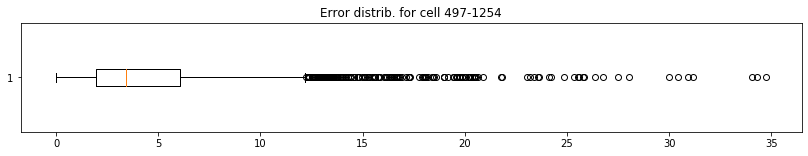

Mean Absolute Error =  4.578867980219399
iteration =  190
497-1255


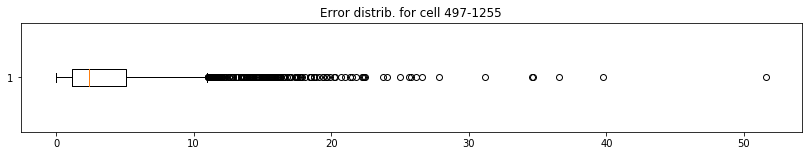

Mean Absolute Error =  3.684435722054844
iteration =  191
497-1256


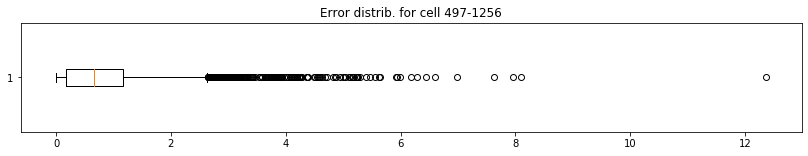

Mean Absolute Error =  0.8790144200618054
iteration =  192
497-1257


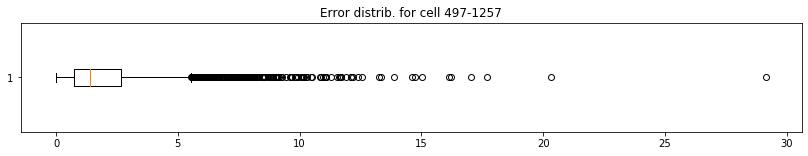

Mean Absolute Error =  2.0366784054321383
iteration =  193
497-1258


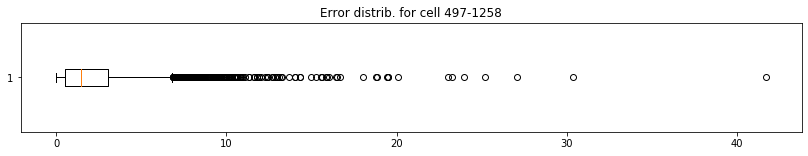

Mean Absolute Error =  2.2956219509102196
iteration =  194
497-1259


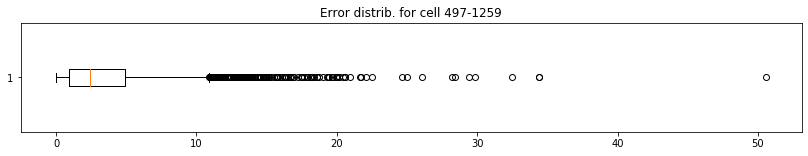

Mean Absolute Error =  3.5851649203193805
iteration =  195
497-1260


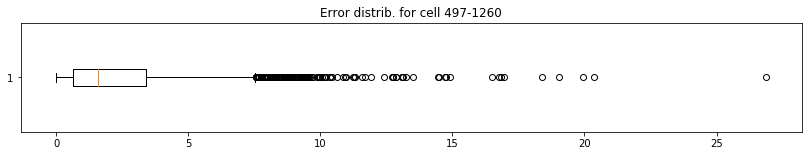

Mean Absolute Error =  2.336614742656697
iteration =  196
497-1261


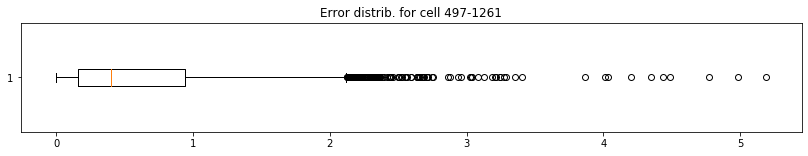

Mean Absolute Error =  0.6240148924407998
iteration =  197
497-1262


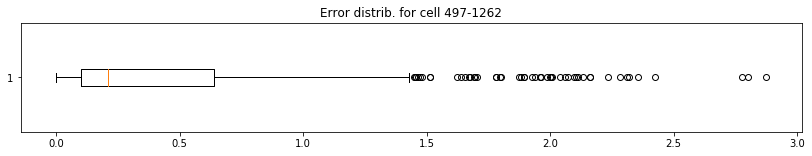

Mean Absolute Error =  0.39664011033465973
iteration =  198
497-1263


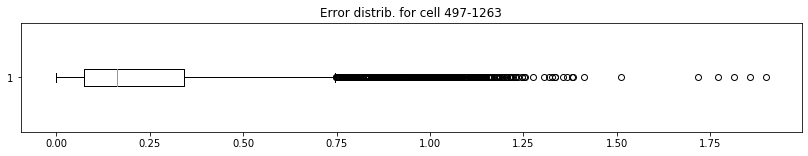

Mean Absolute Error =  0.28281097260070787
iteration =  199
497-1264


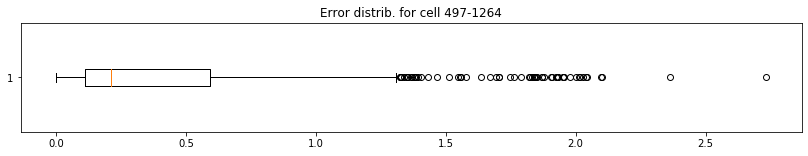

Mean Absolute Error =  0.3824237103510038
iteration =  200
497-1265


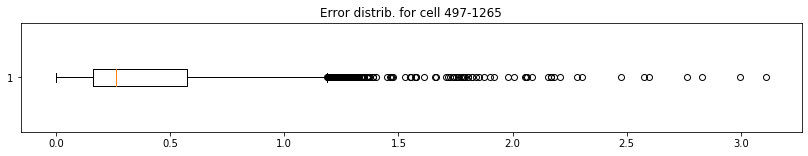

Mean Absolute Error =  0.418886957146509
iteration =  201
497-1266


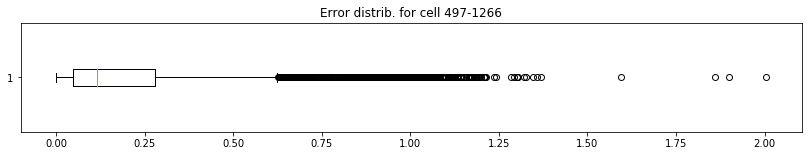

Mean Absolute Error =  0.2571524759588342
iteration =  202
497-1267


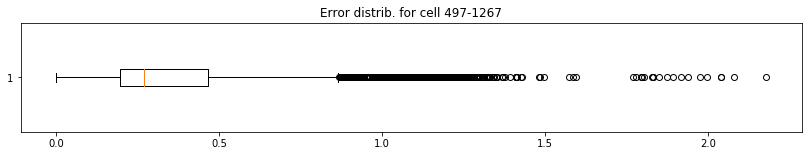

Mean Absolute Error =  0.39051064589116163
iteration =  203
497-1268


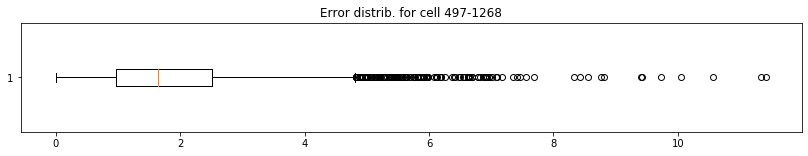

Mean Absolute Error =  1.8956215099002194
iteration =  204
498-1252


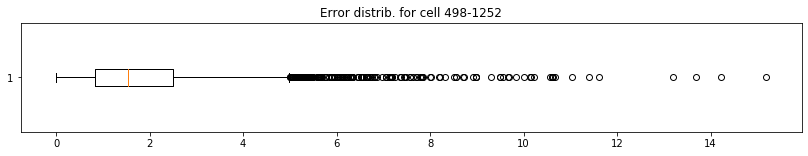

Mean Absolute Error =  1.9145834371773252
iteration =  205
498-1253


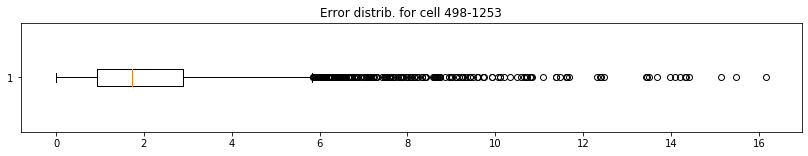

Mean Absolute Error =  2.229784484141343
iteration =  206
498-1254


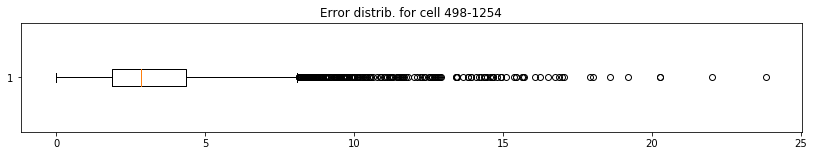

Mean Absolute Error =  3.4781898053209224
iteration =  207
498-1255


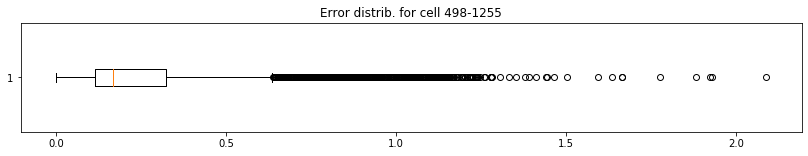

Mean Absolute Error =  0.29698515195839204
iteration =  208
498-1256


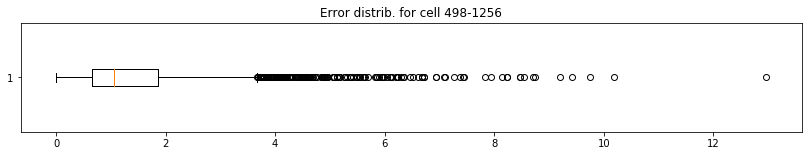

Mean Absolute Error =  1.4063156689001128
iteration =  209
498-1257


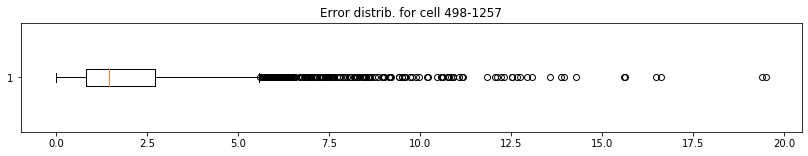

Mean Absolute Error =  2.0739044754448144
iteration =  210
498-1258


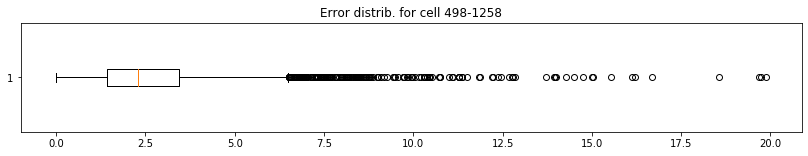

Mean Absolute Error =  2.7353126798567473
iteration =  211
498-1259


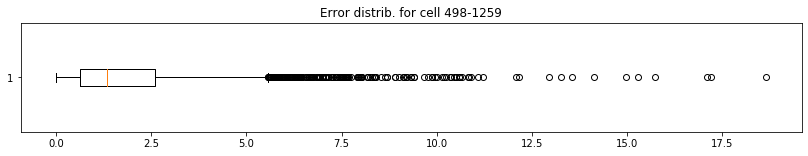

Mean Absolute Error =  1.9259126074181083
iteration =  212
498-1260


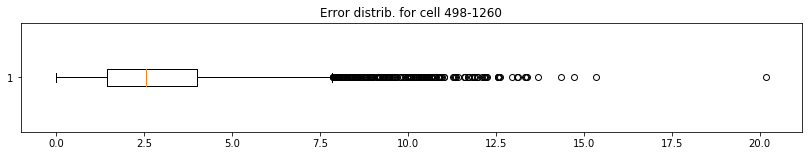

Mean Absolute Error =  3.0482769625510002
iteration =  213
498-1261


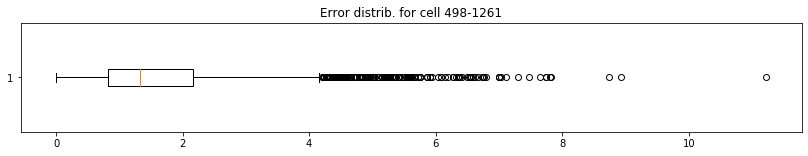

Mean Absolute Error =  1.639608437618335
iteration =  214
498-1262


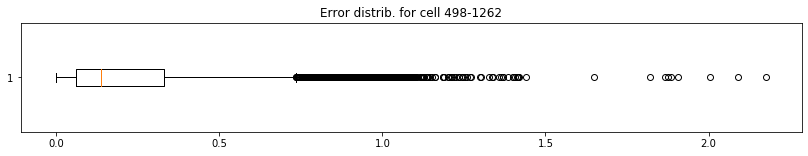

Mean Absolute Error =  0.2716304622600121
iteration =  215
498-1263


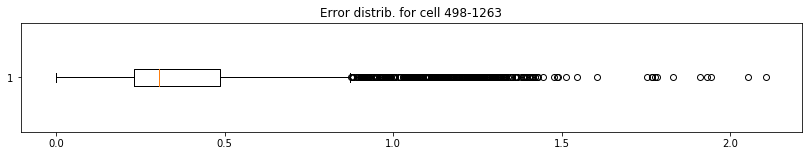

Mean Absolute Error =  0.40737263112302363
iteration =  216
498-1264


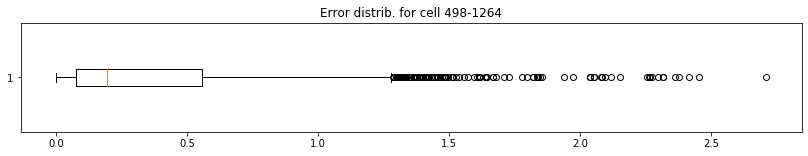

Mean Absolute Error =  0.3686717421575082
iteration =  217
498-1265


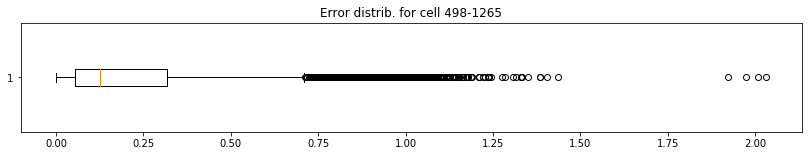

Mean Absolute Error =  0.265087361383573
iteration =  218
498-1266


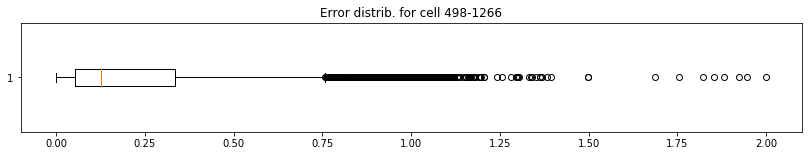

Mean Absolute Error =  0.27220575470457226
iteration =  219
498-1267


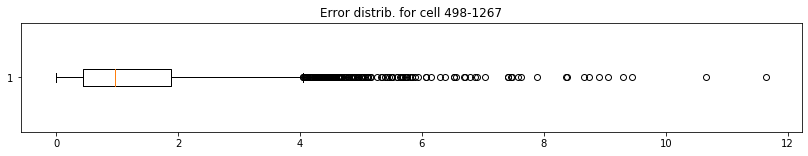

Mean Absolute Error =  1.356789694619565
iteration =  220
498-1268


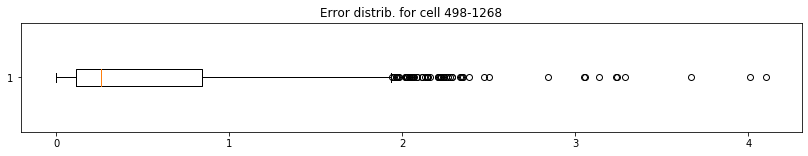

Mean Absolute Error =  0.4833681406230539
iteration =  221


In [67]:
# choose a number of time steps for the window
count = 0
error_per_cell = {}
all_cell_difference = np.array([])

for cell, df_i in agg_by_cell:
    print(cell)
    series = df_i['nr_people'].values
    
    # split into samples
    X, y = split_sequence(series, n_steps)
    
    # split into train and test sets
    train_size = int(len(X) * 0.67)
    test_size = len(X) - train_size
    train_X, test_X = X[0:train_size,:], X[train_size:len(X),:]
    train_y, test_y = y[0:train_size], y[train_size:len(y)]
    
    # define model
    model = Sequential()
    model.add(Dense(100, activation='relu', input_dim=n_steps)) 
    model.add(Dense(1))
    model.compile(loss='mse',optimizer='adam', metrics=[metrics.mae, 'accuracy'])
    model.fit(train_X, train_y, epochs=200, verbose=0)
    
    
    # compute error
    predicted = np.array([])

    for i in range(len(test_X)):
        x_input = test_X[i].reshape((1, n_steps))
        yhat = model.predict(x_input, verbose=0)
        predicted = np.append(predicted, yhat[0]) 

    expected = test_y
    # abs difference
    difference = abs((expected - predicted))
    
    # analytical data
    all_cell_difference = np.append(all_cell_difference, difference)
    error_per_cell[cell] = difference
    
    # show boxplot
    plt.figure(figsize = (14,2))
    plt.boxplot(difference, vert= False);
    plt.title('Error distrib. for cell '+str(cell))    
    plt.show()
    print('Mean Absolute Error = ', np.mean(difference))
    
    # controll
    count +=1
    print('iteration = ', count)
    #if count > 4: break
       

Mean Absolute Error =  2.993502800462652


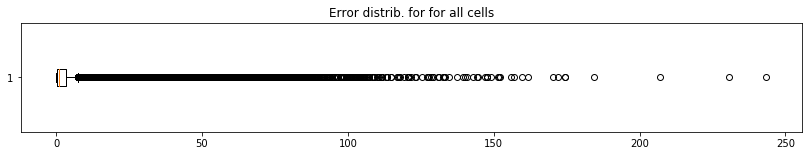

In [68]:
print('Mean Absolute Error = ', np.mean(all_cell_difference))
plt.figure(figsize = (14,2))
plt.boxplot(all_cell_difference, vert= False);
plt.title('Error distrib. for for all cells')    
plt.show()
#np.savetxt('analytics/all_cell_error_values.csv', all_cell_difference)        

In [ ]:
# write errors per cell
import csv
with open('analytics/error_per_cell.csv','w') as f:
    for key in error_per_cell.keys():
        f.write("%s,%s\n"%(key,error_per_cell[key]))

### Convolutional NN per i dati di una sola cella - previsione 1 step

### Dividi in train-test e normaliza i dati

In [30]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


# choose a number of time steps
n_steps = 5

# split into samples
X, y = split_sequence(series, n_steps)
    

'''# normalize    
scaler = MinMaxScaler()
# fit scaler on data
scaler.fit(X)
# apply transform
X = scaler.transform(X)

# fit scaler on data
y = y.reshape(-1, 1)
scaler.fit(y)
# apply transform
y = scaler.transform(y)
'''
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

#for i in range(len(X)):
#    print(X[i], 'y-->  '+str(y[i]))

In [31]:
# split into train and test sets
train_size = int(len(X) * 0.67)
test_size = len(X) - train_size
train_X, test_X = X[0:train_size,:], X[train_size:len(X),:]

train_y, test_y = y[0:train_size], y[train_size:len(y)]
print('X', len(train_X), len(test_X))
print('y ', len(train_y), len(test_y))

X 7908 3895
y  7908 3895


In [32]:
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps,n_features))) 
model.add(MaxPooling1D(pool_size=2)) 
model.add(Flatten())
model.add(Dense(50, activation='relu')) 
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(train_X, train_y, epochs=500, verbose=2)

Epoch 1/500
248/248 - 0s - loss: 78.3739
Epoch 2/500
248/248 - 0s - loss: 8.2353
Epoch 3/500
248/248 - 0s - loss: 7.4171
Epoch 4/500
248/248 - 0s - loss: 6.4515
Epoch 5/500
248/248 - 0s - loss: 5.5419
Epoch 6/500
248/248 - 0s - loss: 4.6619
Epoch 7/500
248/248 - 0s - loss: 3.9965
Epoch 8/500
248/248 - 0s - loss: 3.6676
Epoch 9/500
248/248 - 0s - loss: 3.3903
Epoch 10/500
248/248 - 0s - loss: 3.3334
Epoch 11/500
248/248 - 0s - loss: 3.2638
Epoch 12/500
248/248 - 0s - loss: 3.2753
Epoch 13/500
248/248 - 0s - loss: 3.1426
Epoch 14/500
248/248 - 0s - loss: 3.2546
Epoch 15/500
248/248 - 0s - loss: 3.0781
Epoch 16/500
248/248 - 0s - loss: 2.8661
Epoch 17/500
248/248 - 0s - loss: 2.9311
Epoch 18/500
248/248 - 0s - loss: 2.9505
Epoch 19/500
248/248 - 0s - loss: 2.7792
Epoch 20/500
248/248 - 0s - loss: 2.8753
Epoch 21/500
248/248 - 0s - loss: 2.7325
Epoch 22/500
248/248 - 0s - loss: 2.9708
Epoch 23/500
248/248 - 0s - loss: 2.8433
Epoch 24/500
248/248 - 0s - loss: 2.8141
Epoch 25/500
248/248 - 0

Epoch 199/500
248/248 - 0s - loss: 2.5155
Epoch 200/500
248/248 - 0s - loss: 2.5448
Epoch 201/500
248/248 - 0s - loss: 2.4635
Epoch 202/500
248/248 - 0s - loss: 2.4411
Epoch 203/500
248/248 - 0s - loss: 2.5248
Epoch 204/500
248/248 - 0s - loss: 2.4524
Epoch 205/500
248/248 - 0s - loss: 2.5043
Epoch 206/500
248/248 - 0s - loss: 2.4266
Epoch 207/500
248/248 - 0s - loss: 2.4971
Epoch 208/500
248/248 - 0s - loss: 2.4744
Epoch 209/500
248/248 - 0s - loss: 2.5262
Epoch 210/500
248/248 - 0s - loss: 2.5090
Epoch 211/500
248/248 - 0s - loss: 2.4594
Epoch 212/500
248/248 - 0s - loss: 2.5201
Epoch 213/500
248/248 - 0s - loss: 2.4727
Epoch 214/500
248/248 - 0s - loss: 2.4417
Epoch 215/500
248/248 - 0s - loss: 2.4536
Epoch 216/500
248/248 - 0s - loss: 2.4101
Epoch 217/500
248/248 - 0s - loss: 2.5270
Epoch 218/500
248/248 - 0s - loss: 2.4780
Epoch 219/500
248/248 - 0s - loss: 2.5226
Epoch 220/500
248/248 - 0s - loss: 2.4726
Epoch 221/500
248/248 - 0s - loss: 2.4434
Epoch 222/500
248/248 - 0s - loss:

Epoch 395/500
248/248 - 0s - loss: 2.4226
Epoch 396/500
248/248 - 0s - loss: 2.4108
Epoch 397/500
248/248 - 0s - loss: 2.4850
Epoch 398/500
248/248 - 0s - loss: 2.3896
Epoch 399/500
248/248 - 0s - loss: 2.4261
Epoch 400/500
248/248 - 0s - loss: 2.4264
Epoch 401/500
248/248 - 0s - loss: 2.6290
Epoch 402/500
248/248 - 0s - loss: 2.3869
Epoch 403/500
248/248 - 0s - loss: 2.4042
Epoch 404/500
248/248 - 0s - loss: 2.3953
Epoch 405/500
248/248 - 0s - loss: 2.4069
Epoch 406/500
248/248 - 0s - loss: 2.4147
Epoch 407/500
248/248 - 0s - loss: 2.3910
Epoch 408/500
248/248 - 0s - loss: 2.4203
Epoch 409/500
248/248 - 0s - loss: 2.3930
Epoch 410/500
248/248 - 0s - loss: 2.4138
Epoch 411/500
248/248 - 0s - loss: 2.4027
Epoch 412/500
248/248 - 0s - loss: 2.5067
Epoch 413/500
248/248 - 0s - loss: 2.4247
Epoch 414/500
248/248 - 0s - loss: 2.4727
Epoch 415/500
248/248 - 0s - loss: 2.4539
Epoch 416/500
248/248 - 0s - loss: 2.4113
Epoch 417/500
248/248 - 0s - loss: 2.4152
Epoch 418/500
248/248 - 0s - loss:

In [33]:
# demonstrate prediction
x_input = np.array([0.296875, 0.296875, 0.265625, 0.25, 0.234375])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[1.0035496]]


### Calcolo dell'errore di previsione

In [34]:
# predict and compute error
predicted = np.array([])

for i in range(len(test_X)):
    x_input = test_X[i].reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    predicted = np.append(predicted, yhat[0]) 


predicted = predicted.reshape(-1, 1)    
#predicted = scaler.inverse_transform(predicted)
#expected = scaler.inverse_transform(test_y)  
  

# abs difference
difference = abs((expected - predicted))
print('Mean Absolute Error = ', np.mean(difference))
# show boxplot
plt.figure(figsize = (14,3))
plt.boxplot(difference, vert= False);
plt.show()

Mean Absolute Error =  14.929065352540169


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f8f468b70e0> (for post_execute):


KeyboardInterrupt: 

### Trova numero ottimale di nodi 

number of nodes = 8: 0.000
number of nodes = 16: 0.000
number of nodes = 32: 0.000
number of nodes = 64: 0.000
number of nodes = 128: 0.000


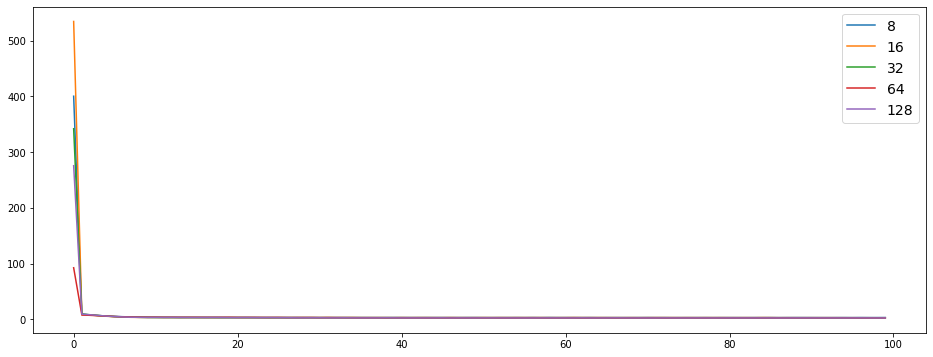

In [35]:
# fit model with given number of nodes, returns test set accuracy
def evaluate_model(n_nodes, train_X, train_y, val_X, val_y): 
    
    # define model
    model = Sequential()
    model.add(Conv1D(filters=n_nodes, kernel_size=2, activation='relu', input_shape=(n_steps,n_features))) 
    model.add(MaxPooling1D(pool_size=2)) 
    model.add(Flatten())
    model.add(Dense(10 , activation='relu')) 
    model.add(Dense(1))

    model.compile(loss='mse',optimizer='adam', metrics=[metrics.mae, 'accuracy'])

    history = model.fit(train_X, train_y, epochs=100, verbose=0)
    unk1, unk2, test_acc = model.evaluate(val_X, val_y, verbose=0)
    return history, test_acc  

plt.figure(figsize = (16, 6))
num_nodes = [8, 16, 32, 64, 128]

for n_nodes in num_nodes:
    # evaluate model with a given number of nodes
    history, result = evaluate_model(n_nodes, train_X, train_y, test_X, test_y)
    # summarize final test set accuracy
    print('number of nodes = %d: %.3f' % (n_nodes, result))
    
    # plot learning curve 
    plt.plot(history.history['loss'], label=str(n_nodes))

# show the plot
plt.legend(prop={'size': 14})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### LSTM per i dati di una sola cella - previsione 1 step

In [36]:
# univariate lstm example
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# choose a number of time steps
n_steps = 10

# split into samples
X, y = split_sequence(series, n_steps)

"""
# normalize    
scaler = MinMaxScaler()
# fit scaler on data
scaler.fit(X)
# apply transform
X = scaler.transform(X)

# fit scaler on data
y = y.reshape(-1, 1)
scaler.fit(y)
# apply transform
y = scaler.transform(y)
"""
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

for i in range(len(X)):
    print(X[i], 'y-->  '+str(y[i]))

[[36.]
 [36.]
 [34.]
 [33.]
 [32.]
 [33.]
 [32.]
 [30.]
 [30.]
 [29.]] y-->  29.0
[[36.]
 [34.]
 [33.]
 [32.]
 [33.]
 [32.]
 [30.]
 [30.]
 [29.]
 [29.]] y-->  27.0
[[34.]
 [33.]
 [32.]
 [33.]
 [32.]
 [30.]
 [30.]
 [29.]
 [29.]
 [27.]] y-->  27.0
[[33.]
 [32.]
 [33.]
 [32.]
 [30.]
 [30.]
 [29.]
 [29.]
 [27.]
 [27.]] y-->  25.0
[[32.]
 [33.]
 [32.]
 [30.]
 [30.]
 [29.]
 [29.]
 [27.]
 [27.]
 [25.]] y-->  24.0
[[33.]
 [32.]
 [30.]
 [30.]
 [29.]
 [29.]
 [27.]
 [27.]
 [25.]
 [24.]] y-->  23.0
[[32.]
 [30.]
 [30.]
 [29.]
 [29.]
 [27.]
 [27.]
 [25.]
 [24.]
 [23.]] y-->  22.0
[[30.]
 [30.]
 [29.]
 [29.]
 [27.]
 [27.]
 [25.]
 [24.]
 [23.]
 [22.]] y-->  21.0
[[30.]
 [29.]
 [29.]
 [27.]
 [27.]
 [25.]
 [24.]
 [23.]
 [22.]
 [21.]] y-->  20.0
[[29.]
 [29.]
 [27.]
 [27.]
 [25.]
 [24.]
 [23.]
 [22.]
 [21.]
 [20.]] y-->  20.0
[[29.]
 [27.]
 [27.]
 [25.]
 [24.]
 [23.]
 [22.]
 [21.]
 [20.]
 [20.]] y-->  19.0
[[27.]
 [27.]
 [25.]
 [24.]
 [23.]
 [22.]
 [21.]
 [20.]
 [20.]
 [19.]] y-->  19.0
[[27.]
 [25.]
 [

 [30.]] y-->  30.0
[[36.]
 [36.]
 [36.]
 [33.]
 [33.]
 [32.]
 [32.]
 [31.]
 [30.]
 [30.]] y-->  29.0
[[36.]
 [36.]
 [33.]
 [33.]
 [32.]
 [32.]
 [31.]
 [30.]
 [30.]
 [29.]] y-->  29.0
[[36.]
 [33.]
 [33.]
 [32.]
 [32.]
 [31.]
 [30.]
 [30.]
 [29.]
 [29.]] y-->  29.0
[[33.]
 [33.]
 [32.]
 [32.]
 [31.]
 [30.]
 [30.]
 [29.]
 [29.]
 [29.]] y-->  26.0
[[33.]
 [32.]
 [32.]
 [31.]
 [30.]
 [30.]
 [29.]
 [29.]
 [29.]
 [26.]] y-->  26.0
[[32.]
 [32.]
 [31.]
 [30.]
 [30.]
 [29.]
 [29.]
 [29.]
 [26.]
 [26.]] y-->  26.0
[[32.]
 [31.]
 [30.]
 [30.]
 [29.]
 [29.]
 [29.]
 [26.]
 [26.]
 [26.]] y-->  26.0
[[31.]
 [30.]
 [30.]
 [29.]
 [29.]
 [29.]
 [26.]
 [26.]
 [26.]
 [26.]] y-->  25.0
[[30.]
 [30.]
 [29.]
 [29.]
 [29.]
 [26.]
 [26.]
 [26.]
 [26.]
 [25.]] y-->  26.0
[[30.]
 [29.]
 [29.]
 [29.]
 [26.]
 [26.]
 [26.]
 [26.]
 [25.]
 [26.]] y-->  25.0
[[29.]
 [29.]
 [29.]
 [26.]
 [26.]
 [26.]
 [26.]
 [25.]
 [26.]
 [25.]] y-->  25.0
[[29.]
 [29.]
 [26.]
 [26.]
 [26.]
 [26.]
 [25.]
 [26.]
 [25.]
 [25.]] y-->  27

 [22.]] y-->  22.0
[[25.]
 [23.]
 [23.]
 [23.]
 [24.]
 [23.]
 [23.]
 [22.]
 [22.]
 [22.]] y-->  22.0
[[23.]
 [23.]
 [23.]
 [24.]
 [23.]
 [23.]
 [22.]
 [22.]
 [22.]
 [22.]] y-->  22.0
[[23.]
 [23.]
 [24.]
 [23.]
 [23.]
 [22.]
 [22.]
 [22.]
 [22.]
 [22.]] y-->  24.0
[[23.]
 [24.]
 [23.]
 [23.]
 [22.]
 [22.]
 [22.]
 [22.]
 [22.]
 [24.]] y-->  25.0
[[24.]
 [23.]
 [23.]
 [22.]
 [22.]
 [22.]
 [22.]
 [22.]
 [24.]
 [25.]] y-->  25.0
[[23.]
 [23.]
 [22.]
 [22.]
 [22.]
 [22.]
 [22.]
 [24.]
 [25.]
 [25.]] y-->  27.0
[[23.]
 [22.]
 [22.]
 [22.]
 [22.]
 [22.]
 [24.]
 [25.]
 [25.]
 [27.]] y-->  29.0
[[22.]
 [22.]
 [22.]
 [22.]
 [22.]
 [24.]
 [25.]
 [25.]
 [27.]
 [29.]] y-->  29.0
[[22.]
 [22.]
 [22.]
 [22.]
 [24.]
 [25.]
 [25.]
 [27.]
 [29.]
 [29.]] y-->  28.0
[[22.]
 [22.]
 [22.]
 [24.]
 [25.]
 [25.]
 [27.]
 [29.]
 [29.]
 [28.]] y-->  28.0
[[22.]
 [22.]
 [24.]
 [25.]
 [25.]
 [27.]
 [29.]
 [29.]
 [28.]
 [28.]] y-->  29.0
[[22.]
 [24.]
 [25.]
 [25.]
 [27.]
 [29.]
 [29.]
 [28.]
 [28.]
 [29.]] y-->  29

[[37.]
 [41.]
 [41.]
 [41.]
 [43.]
 [44.]
 [44.]
 [47.]
 [48.]
 [48.]] y-->  49.0
[[41.]
 [41.]
 [41.]
 [43.]
 [44.]
 [44.]
 [47.]
 [48.]
 [48.]
 [49.]] y-->  49.0
[[41.]
 [41.]
 [43.]
 [44.]
 [44.]
 [47.]
 [48.]
 [48.]
 [49.]
 [49.]] y-->  49.0
[[41.]
 [43.]
 [44.]
 [44.]
 [47.]
 [48.]
 [48.]
 [49.]
 [49.]
 [49.]] y-->  50.0
[[43.]
 [44.]
 [44.]
 [47.]
 [48.]
 [48.]
 [49.]
 [49.]
 [49.]
 [50.]] y-->  51.0
[[44.]
 [44.]
 [47.]
 [48.]
 [48.]
 [49.]
 [49.]
 [49.]
 [50.]
 [51.]] y-->  53.0
[[44.]
 [47.]
 [48.]
 [48.]
 [49.]
 [49.]
 [49.]
 [50.]
 [51.]
 [53.]] y-->  54.0
[[47.]
 [48.]
 [48.]
 [49.]
 [49.]
 [49.]
 [50.]
 [51.]
 [53.]
 [54.]] y-->  56.0
[[48.]
 [48.]
 [49.]
 [49.]
 [49.]
 [50.]
 [51.]
 [53.]
 [54.]
 [56.]] y-->  56.0
[[48.]
 [49.]
 [49.]
 [49.]
 [50.]
 [51.]
 [53.]
 [54.]
 [56.]
 [56.]] y-->  58.0
[[49.]
 [49.]
 [49.]
 [50.]
 [51.]
 [53.]
 [54.]
 [56.]
 [56.]
 [58.]] y-->  60.0
[[49.]
 [49.]
 [50.]
 [51.]
 [53.]
 [54.]
 [56.]
 [56.]
 [58.]
 [60.]] y-->  60.0
[[49.]
 [50.]
 [

 [59.]] y-->  58.0
[[47.]
 [47.]
 [49.]
 [53.]
 [56.]
 [58.]
 [57.]
 [59.]
 [59.]
 [58.]] y-->  61.0
[[47.]
 [49.]
 [53.]
 [56.]
 [58.]
 [57.]
 [59.]
 [59.]
 [58.]
 [61.]] y-->  59.0
[[49.]
 [53.]
 [56.]
 [58.]
 [57.]
 [59.]
 [59.]
 [58.]
 [61.]
 [59.]] y-->  59.0
[[53.]
 [56.]
 [58.]
 [57.]
 [59.]
 [59.]
 [58.]
 [61.]
 [59.]
 [59.]] y-->  59.0
[[56.]
 [58.]
 [57.]
 [59.]
 [59.]
 [58.]
 [61.]
 [59.]
 [59.]
 [59.]] y-->  59.0
[[58.]
 [57.]
 [59.]
 [59.]
 [58.]
 [61.]
 [59.]
 [59.]
 [59.]
 [59.]] y-->  59.0
[[57.]
 [59.]
 [59.]
 [58.]
 [61.]
 [59.]
 [59.]
 [59.]
 [59.]
 [59.]] y-->  57.0
[[59.]
 [59.]
 [58.]
 [61.]
 [59.]
 [59.]
 [59.]
 [59.]
 [59.]
 [57.]] y-->  55.0
[[59.]
 [58.]
 [61.]
 [59.]
 [59.]
 [59.]
 [59.]
 [59.]
 [57.]
 [55.]] y-->  54.0
[[58.]
 [61.]
 [59.]
 [59.]
 [59.]
 [59.]
 [59.]
 [57.]
 [55.]
 [54.]] y-->  54.0
[[61.]
 [59.]
 [59.]
 [59.]
 [59.]
 [59.]
 [57.]
 [55.]
 [54.]
 [54.]] y-->  53.0
[[59.]
 [59.]
 [59.]
 [59.]
 [59.]
 [57.]
 [55.]
 [54.]
 [54.]
 [53.]] y-->  53

 [50.]] y-->  51.0
[[63.]
 [63.]
 [60.]
 [58.]
 [58.]
 [54.]
 [52.]
 [51.]
 [50.]
 [51.]] y-->  53.0
[[63.]
 [60.]
 [58.]
 [58.]
 [54.]
 [52.]
 [51.]
 [50.]
 [51.]
 [53.]] y-->  53.0
[[60.]
 [58.]
 [58.]
 [54.]
 [52.]
 [51.]
 [50.]
 [51.]
 [53.]
 [53.]] y-->  51.0
[[58.]
 [58.]
 [54.]
 [52.]
 [51.]
 [50.]
 [51.]
 [53.]
 [53.]
 [51.]] y-->  49.0
[[58.]
 [54.]
 [52.]
 [51.]
 [50.]
 [51.]
 [53.]
 [53.]
 [51.]
 [49.]] y-->  48.0
[[54.]
 [52.]
 [51.]
 [50.]
 [51.]
 [53.]
 [53.]
 [51.]
 [49.]
 [48.]] y-->  46.0
[[52.]
 [51.]
 [50.]
 [51.]
 [53.]
 [53.]
 [51.]
 [49.]
 [48.]
 [46.]] y-->  44.0
[[51.]
 [50.]
 [51.]
 [53.]
 [53.]
 [51.]
 [49.]
 [48.]
 [46.]
 [44.]] y-->  43.0
[[50.]
 [51.]
 [53.]
 [53.]
 [51.]
 [49.]
 [48.]
 [46.]
 [44.]
 [43.]] y-->  42.0
[[51.]
 [53.]
 [53.]
 [51.]
 [49.]
 [48.]
 [46.]
 [44.]
 [43.]
 [42.]] y-->  41.0
[[53.]
 [53.]
 [51.]
 [49.]
 [48.]
 [46.]
 [44.]
 [43.]
 [42.]
 [41.]] y-->  41.0
[[53.]
 [51.]
 [49.]
 [48.]
 [46.]
 [44.]
 [43.]
 [42.]
 [41.]
 [41.]] y-->  41

 [29.]] y-->  28.0
[[34.]
 [34.]
 [34.]
 [33.]
 [32.]
 [31.]
 [31.]
 [30.]
 [29.]
 [28.]] y-->  27.0
[[34.]
 [34.]
 [33.]
 [32.]
 [31.]
 [31.]
 [30.]
 [29.]
 [28.]
 [27.]] y-->  27.0
[[34.]
 [33.]
 [32.]
 [31.]
 [31.]
 [30.]
 [29.]
 [28.]
 [27.]
 [27.]] y-->  26.0
[[33.]
 [32.]
 [31.]
 [31.]
 [30.]
 [29.]
 [28.]
 [27.]
 [27.]
 [26.]] y-->  26.0
[[32.]
 [31.]
 [31.]
 [30.]
 [29.]
 [28.]
 [27.]
 [27.]
 [26.]
 [26.]] y-->  25.0
[[31.]
 [31.]
 [30.]
 [29.]
 [28.]
 [27.]
 [27.]
 [26.]
 [26.]
 [25.]] y-->  25.0
[[31.]
 [30.]
 [29.]
 [28.]
 [27.]
 [27.]
 [26.]
 [26.]
 [25.]
 [25.]] y-->  25.0
[[30.]
 [29.]
 [28.]
 [27.]
 [27.]
 [26.]
 [26.]
 [25.]
 [25.]
 [25.]] y-->  25.0
[[29.]
 [28.]
 [27.]
 [27.]
 [26.]
 [26.]
 [25.]
 [25.]
 [25.]
 [25.]] y-->  26.0
[[28.]
 [27.]
 [27.]
 [26.]
 [26.]
 [25.]
 [25.]
 [25.]
 [25.]
 [26.]] y-->  26.0
[[27.]
 [27.]
 [26.]
 [26.]
 [25.]
 [25.]
 [25.]
 [25.]
 [26.]
 [26.]] y-->  26.0
[[27.]
 [26.]
 [26.]
 [25.]
 [25.]
 [25.]
 [25.]
 [26.]
 [26.]
 [26.]] y-->  26

[[27.]
 [28.]
 [28.]
 [27.]
 [26.]
 [25.]
 [27.]
 [28.]
 [28.]
 [29.]] y-->  30.0
[[28.]
 [28.]
 [27.]
 [26.]
 [25.]
 [27.]
 [28.]
 [28.]
 [29.]
 [30.]] y-->  32.0
[[28.]
 [27.]
 [26.]
 [25.]
 [27.]
 [28.]
 [28.]
 [29.]
 [30.]
 [32.]] y-->  35.0
[[27.]
 [26.]
 [25.]
 [27.]
 [28.]
 [28.]
 [29.]
 [30.]
 [32.]
 [35.]] y-->  39.0
[[26.]
 [25.]
 [27.]
 [28.]
 [28.]
 [29.]
 [30.]
 [32.]
 [35.]
 [39.]] y-->  39.0
[[25.]
 [27.]
 [28.]
 [28.]
 [29.]
 [30.]
 [32.]
 [35.]
 [39.]
 [39.]] y-->  39.0
[[27.]
 [28.]
 [28.]
 [29.]
 [30.]
 [32.]
 [35.]
 [39.]
 [39.]
 [39.]] y-->  39.0
[[28.]
 [28.]
 [29.]
 [30.]
 [32.]
 [35.]
 [39.]
 [39.]
 [39.]
 [39.]] y-->  39.0
[[28.]
 [29.]
 [30.]
 [32.]
 [35.]
 [39.]
 [39.]
 [39.]
 [39.]
 [39.]] y-->  39.0
[[29.]
 [30.]
 [32.]
 [35.]
 [39.]
 [39.]
 [39.]
 [39.]
 [39.]
 [39.]] y-->  40.0
[[30.]
 [32.]
 [35.]
 [39.]
 [39.]
 [39.]
 [39.]
 [39.]
 [39.]
 [40.]] y-->  40.0
[[32.]
 [35.]
 [39.]
 [39.]
 [39.]
 [39.]
 [39.]
 [39.]
 [40.]
 [40.]] y-->  43.0
[[35.]
 [39.]
 [

 [43.]] y-->  43.0
[[35.]
 [37.]
 [37.]
 [37.]
 [38.]
 [38.]
 [38.]
 [38.]
 [43.]
 [43.]] y-->  41.0
[[37.]
 [37.]
 [37.]
 [38.]
 [38.]
 [38.]
 [38.]
 [43.]
 [43.]
 [41.]] y-->  41.0
[[37.]
 [37.]
 [38.]
 [38.]
 [38.]
 [38.]
 [43.]
 [43.]
 [41.]
 [41.]] y-->  41.0
[[37.]
 [38.]
 [38.]
 [38.]
 [38.]
 [43.]
 [43.]
 [41.]
 [41.]
 [41.]] y-->  41.0
[[38.]
 [38.]
 [38.]
 [38.]
 [43.]
 [43.]
 [41.]
 [41.]
 [41.]
 [41.]] y-->  41.0
[[38.]
 [38.]
 [38.]
 [43.]
 [43.]
 [41.]
 [41.]
 [41.]
 [41.]
 [41.]] y-->  41.0
[[38.]
 [38.]
 [43.]
 [43.]
 [41.]
 [41.]
 [41.]
 [41.]
 [41.]
 [41.]] y-->  45.0
[[38.]
 [43.]
 [43.]
 [41.]
 [41.]
 [41.]
 [41.]
 [41.]
 [41.]
 [45.]] y-->  46.0
[[43.]
 [43.]
 [41.]
 [41.]
 [41.]
 [41.]
 [41.]
 [41.]
 [45.]
 [46.]] y-->  48.0
[[43.]
 [41.]
 [41.]
 [41.]
 [41.]
 [41.]
 [41.]
 [45.]
 [46.]
 [48.]] y-->  48.0
[[41.]
 [41.]
 [41.]
 [41.]
 [41.]
 [41.]
 [45.]
 [46.]
 [48.]
 [48.]] y-->  48.0
[[41.]
 [41.]
 [41.]
 [41.]
 [41.]
 [45.]
 [46.]
 [48.]
 [48.]
 [48.]] y-->  52

 [55.]] y-->  55.0
[[51.]
 [53.]
 [54.]
 [52.]
 [55.]
 [56.]
 [55.]
 [55.]
 [55.]
 [55.]] y-->  56.0
[[53.]
 [54.]
 [52.]
 [55.]
 [56.]
 [55.]
 [55.]
 [55.]
 [55.]
 [56.]] y-->  56.0
[[54.]
 [52.]
 [55.]
 [56.]
 [55.]
 [55.]
 [55.]
 [55.]
 [56.]
 [56.]] y-->  58.0
[[52.]
 [55.]
 [56.]
 [55.]
 [55.]
 [55.]
 [55.]
 [56.]
 [56.]
 [58.]] y-->  59.0
[[55.]
 [56.]
 [55.]
 [55.]
 [55.]
 [55.]
 [56.]
 [56.]
 [58.]
 [59.]] y-->  60.0
[[56.]
 [55.]
 [55.]
 [55.]
 [55.]
 [56.]
 [56.]
 [58.]
 [59.]
 [60.]] y-->  60.0
[[55.]
 [55.]
 [55.]
 [55.]
 [56.]
 [56.]
 [58.]
 [59.]
 [60.]
 [60.]] y-->  61.0
[[55.]
 [55.]
 [55.]
 [56.]
 [56.]
 [58.]
 [59.]
 [60.]
 [60.]
 [61.]] y-->  64.0
[[55.]
 [55.]
 [56.]
 [56.]
 [58.]
 [59.]
 [60.]
 [60.]
 [61.]
 [64.]] y-->  64.0
[[55.]
 [56.]
 [56.]
 [58.]
 [59.]
 [60.]
 [60.]
 [61.]
 [64.]
 [64.]] y-->  63.0
[[56.]
 [56.]
 [58.]
 [59.]
 [60.]
 [60.]
 [61.]
 [64.]
 [64.]
 [63.]] y-->  63.0
[[56.]
 [58.]
 [59.]
 [60.]
 [60.]
 [61.]
 [64.]
 [64.]
 [63.]
 [63.]] y-->  65

 [41.]] y-->  41.0
[[33.]
 [35.]
 [36.]
 [38.]
 [42.]
 [44.]
 [43.]
 [43.]
 [41.]
 [41.]] y-->  40.0
[[35.]
 [36.]
 [38.]
 [42.]
 [44.]
 [43.]
 [43.]
 [41.]
 [41.]
 [40.]] y-->  42.0
[[36.]
 [38.]
 [42.]
 [44.]
 [43.]
 [43.]
 [41.]
 [41.]
 [40.]
 [42.]] y-->  43.0
[[38.]
 [42.]
 [44.]
 [43.]
 [43.]
 [41.]
 [41.]
 [40.]
 [42.]
 [43.]] y-->  44.0
[[42.]
 [44.]
 [43.]
 [43.]
 [41.]
 [41.]
 [40.]
 [42.]
 [43.]
 [44.]] y-->  44.0
[[44.]
 [43.]
 [43.]
 [41.]
 [41.]
 [40.]
 [42.]
 [43.]
 [44.]
 [44.]] y-->  45.0
[[43.]
 [43.]
 [41.]
 [41.]
 [40.]
 [42.]
 [43.]
 [44.]
 [44.]
 [45.]] y-->  45.0
[[43.]
 [41.]
 [41.]
 [40.]
 [42.]
 [43.]
 [44.]
 [44.]
 [45.]
 [45.]] y-->  48.0
[[41.]
 [41.]
 [40.]
 [42.]
 [43.]
 [44.]
 [44.]
 [45.]
 [45.]
 [48.]] y-->  49.0
[[41.]
 [40.]
 [42.]
 [43.]
 [44.]
 [44.]
 [45.]
 [45.]
 [48.]
 [49.]] y-->  51.0
[[40.]
 [42.]
 [43.]
 [44.]
 [44.]
 [45.]
 [45.]
 [48.]
 [49.]
 [51.]] y-->  52.0
[[42.]
 [43.]
 [44.]
 [44.]
 [45.]
 [45.]
 [48.]
 [49.]
 [51.]
 [52.]] y-->  52

 [46.]] y-->  46.0
[[57.]
 [56.]
 [56.]
 [55.]
 [53.]
 [53.]
 [48.]
 [47.]
 [46.]
 [46.]] y-->  45.0
[[56.]
 [56.]
 [55.]
 [53.]
 [53.]
 [48.]
 [47.]
 [46.]
 [46.]
 [45.]] y-->  44.0
[[56.]
 [55.]
 [53.]
 [53.]
 [48.]
 [47.]
 [46.]
 [46.]
 [45.]
 [44.]] y-->  43.0
[[55.]
 [53.]
 [53.]
 [48.]
 [47.]
 [46.]
 [46.]
 [45.]
 [44.]
 [43.]] y-->  43.0
[[53.]
 [53.]
 [48.]
 [47.]
 [46.]
 [46.]
 [45.]
 [44.]
 [43.]
 [43.]] y-->  44.0
[[53.]
 [48.]
 [47.]
 [46.]
 [46.]
 [45.]
 [44.]
 [43.]
 [43.]
 [44.]] y-->  41.0
[[48.]
 [47.]
 [46.]
 [46.]
 [45.]
 [44.]
 [43.]
 [43.]
 [44.]
 [41.]] y-->  40.0
[[47.]
 [46.]
 [46.]
 [45.]
 [44.]
 [43.]
 [43.]
 [44.]
 [41.]
 [40.]] y-->  38.0
[[46.]
 [46.]
 [45.]
 [44.]
 [43.]
 [43.]
 [44.]
 [41.]
 [40.]
 [38.]] y-->  38.0
[[46.]
 [45.]
 [44.]
 [43.]
 [43.]
 [44.]
 [41.]
 [40.]
 [38.]
 [38.]] y-->  37.0
[[45.]
 [44.]
 [43.]
 [43.]
 [44.]
 [41.]
 [40.]
 [38.]
 [38.]
 [37.]] y-->  37.0
[[44.]
 [43.]
 [43.]
 [44.]
 [41.]
 [40.]
 [38.]
 [38.]
 [37.]
 [37.]] y-->  35

 [70.]] y-->  70.0
[[74.]
 [74.]
 [73.]
 [72.]
 [68.]
 [67.]
 [68.]
 [68.]
 [70.]
 [70.]] y-->  72.0
[[74.]
 [73.]
 [72.]
 [68.]
 [67.]
 [68.]
 [68.]
 [70.]
 [70.]
 [72.]] y-->  73.0
[[73.]
 [72.]
 [68.]
 [67.]
 [68.]
 [68.]
 [70.]
 [70.]
 [72.]
 [73.]] y-->  71.0
[[72.]
 [68.]
 [67.]
 [68.]
 [68.]
 [70.]
 [70.]
 [72.]
 [73.]
 [71.]] y-->  71.0
[[68.]
 [67.]
 [68.]
 [68.]
 [70.]
 [70.]
 [72.]
 [73.]
 [71.]
 [71.]] y-->  66.0
[[67.]
 [68.]
 [68.]
 [70.]
 [70.]
 [72.]
 [73.]
 [71.]
 [71.]
 [66.]] y-->  63.0
[[68.]
 [68.]
 [70.]
 [70.]
 [72.]
 [73.]
 [71.]
 [71.]
 [66.]
 [63.]] y-->  61.0
[[68.]
 [70.]
 [70.]
 [72.]
 [73.]
 [71.]
 [71.]
 [66.]
 [63.]
 [61.]] y-->  60.0
[[70.]
 [70.]
 [72.]
 [73.]
 [71.]
 [71.]
 [66.]
 [63.]
 [61.]
 [60.]] y-->  57.0
[[70.]
 [72.]
 [73.]
 [71.]
 [71.]
 [66.]
 [63.]
 [61.]
 [60.]
 [57.]] y-->  57.0
[[72.]
 [73.]
 [71.]
 [71.]
 [66.]
 [63.]
 [61.]
 [60.]
 [57.]
 [57.]] y-->  53.0
[[73.]
 [71.]
 [71.]
 [66.]
 [63.]
 [61.]
 [60.]
 [57.]
 [57.]
 [53.]] y-->  51

 [43.]] y-->  42.0
[[49.]
 [49.]
 [51.]
 [52.]
 [51.]
 [48.]
 [48.]
 [48.]
 [43.]
 [42.]] y-->  41.0
[[49.]
 [51.]
 [52.]
 [51.]
 [48.]
 [48.]
 [48.]
 [43.]
 [42.]
 [41.]] y-->  41.0
[[51.]
 [52.]
 [51.]
 [48.]
 [48.]
 [48.]
 [43.]
 [42.]
 [41.]
 [41.]] y-->  40.0
[[52.]
 [51.]
 [48.]
 [48.]
 [48.]
 [43.]
 [42.]
 [41.]
 [41.]
 [40.]] y-->  39.0
[[51.]
 [48.]
 [48.]
 [48.]
 [43.]
 [42.]
 [41.]
 [41.]
 [40.]
 [39.]] y-->  38.0
[[48.]
 [48.]
 [48.]
 [43.]
 [42.]
 [41.]
 [41.]
 [40.]
 [39.]
 [38.]] y-->  37.0
[[48.]
 [48.]
 [43.]
 [42.]
 [41.]
 [41.]
 [40.]
 [39.]
 [38.]
 [37.]] y-->  37.0
[[48.]
 [43.]
 [42.]
 [41.]
 [41.]
 [40.]
 [39.]
 [38.]
 [37.]
 [37.]] y-->  36.0
[[43.]
 [42.]
 [41.]
 [41.]
 [40.]
 [39.]
 [38.]
 [37.]
 [37.]
 [36.]] y-->  36.0
[[42.]
 [41.]
 [41.]
 [40.]
 [39.]
 [38.]
 [37.]
 [37.]
 [36.]
 [36.]] y-->  34.0
[[41.]
 [41.]
 [40.]
 [39.]
 [38.]
 [37.]
 [37.]
 [36.]
 [36.]
 [34.]] y-->  33.0
[[41.]
 [40.]
 [39.]
 [38.]
 [37.]
 [37.]
 [36.]
 [36.]
 [34.]
 [33.]] y-->  32

 [51.]] y-->  50.0
[[64.]
 [64.]
 [64.]
 [55.]
 [55.]
 [56.]
 [54.]
 [52.]
 [51.]
 [50.]] y-->  52.0
[[64.]
 [64.]
 [55.]
 [55.]
 [56.]
 [54.]
 [52.]
 [51.]
 [50.]
 [52.]] y-->  52.0
[[64.]
 [55.]
 [55.]
 [56.]
 [54.]
 [52.]
 [51.]
 [50.]
 [52.]
 [52.]] y-->  52.0
[[55.]
 [55.]
 [56.]
 [54.]
 [52.]
 [51.]
 [50.]
 [52.]
 [52.]
 [52.]] y-->  49.0
[[55.]
 [56.]
 [54.]
 [52.]
 [51.]
 [50.]
 [52.]
 [52.]
 [52.]
 [49.]] y-->  49.0
[[56.]
 [54.]
 [52.]
 [51.]
 [50.]
 [52.]
 [52.]
 [52.]
 [49.]
 [49.]] y-->  47.0
[[54.]
 [52.]
 [51.]
 [50.]
 [52.]
 [52.]
 [52.]
 [49.]
 [49.]
 [47.]] y-->  46.0
[[52.]
 [51.]
 [50.]
 [52.]
 [52.]
 [52.]
 [49.]
 [49.]
 [47.]
 [46.]] y-->  46.0
[[51.]
 [50.]
 [52.]
 [52.]
 [52.]
 [49.]
 [49.]
 [47.]
 [46.]
 [46.]] y-->  44.0
[[50.]
 [52.]
 [52.]
 [52.]
 [49.]
 [49.]
 [47.]
 [46.]
 [46.]
 [44.]] y-->  44.0
[[52.]
 [52.]
 [52.]
 [49.]
 [49.]
 [47.]
 [46.]
 [46.]
 [44.]
 [44.]] y-->  44.0
[[52.]
 [52.]
 [49.]
 [49.]
 [47.]
 [46.]
 [46.]
 [44.]
 [44.]
 [44.]] y-->  40

 [34.]] y-->  34.0
[[25.]
 [26.]
 [28.]
 [28.]
 [31.]
 [32.]
 [32.]
 [32.]
 [34.]
 [34.]] y-->  34.0
[[26.]
 [28.]
 [28.]
 [31.]
 [32.]
 [32.]
 [32.]
 [34.]
 [34.]
 [34.]] y-->  34.0
[[28.]
 [28.]
 [31.]
 [32.]
 [32.]
 [32.]
 [34.]
 [34.]
 [34.]
 [34.]] y-->  37.0
[[28.]
 [31.]
 [32.]
 [32.]
 [32.]
 [34.]
 [34.]
 [34.]
 [34.]
 [37.]] y-->  37.0
[[31.]
 [32.]
 [32.]
 [32.]
 [34.]
 [34.]
 [34.]
 [34.]
 [37.]
 [37.]] y-->  38.0
[[32.]
 [32.]
 [32.]
 [34.]
 [34.]
 [34.]
 [34.]
 [37.]
 [37.]
 [38.]] y-->  38.0
[[32.]
 [32.]
 [34.]
 [34.]
 [34.]
 [34.]
 [37.]
 [37.]
 [38.]
 [38.]] y-->  40.0
[[32.]
 [34.]
 [34.]
 [34.]
 [34.]
 [37.]
 [37.]
 [38.]
 [38.]
 [40.]] y-->  41.0
[[34.]
 [34.]
 [34.]
 [34.]
 [37.]
 [37.]
 [38.]
 [38.]
 [40.]
 [41.]] y-->  41.0
[[34.]
 [34.]
 [34.]
 [37.]
 [37.]
 [38.]
 [38.]
 [40.]
 [41.]
 [41.]] y-->  41.0
[[34.]
 [34.]
 [37.]
 [37.]
 [38.]
 [38.]
 [40.]
 [41.]
 [41.]
 [41.]] y-->  41.0
[[34.]
 [37.]
 [37.]
 [38.]
 [38.]
 [40.]
 [41.]
 [41.]
 [41.]
 [41.]] y-->  42

 [61.]] y-->  59.0
[[67.]
 [67.]
 [68.]
 [69.]
 [68.]
 [67.]
 [64.]
 [62.]
 [61.]
 [59.]] y-->  57.0
[[67.]
 [68.]
 [69.]
 [68.]
 [67.]
 [64.]
 [62.]
 [61.]
 [59.]
 [57.]] y-->  56.0
[[68.]
 [69.]
 [68.]
 [67.]
 [64.]
 [62.]
 [61.]
 [59.]
 [57.]
 [56.]] y-->  55.0
[[69.]
 [68.]
 [67.]
 [64.]
 [62.]
 [61.]
 [59.]
 [57.]
 [56.]
 [55.]] y-->  55.0
[[68.]
 [67.]
 [64.]
 [62.]
 [61.]
 [59.]
 [57.]
 [56.]
 [55.]
 [55.]] y-->  55.0
[[67.]
 [64.]
 [62.]
 [61.]
 [59.]
 [57.]
 [56.]
 [55.]
 [55.]
 [55.]] y-->  51.0
[[64.]
 [62.]
 [61.]
 [59.]
 [57.]
 [56.]
 [55.]
 [55.]
 [55.]
 [51.]] y-->  51.0
[[62.]
 [61.]
 [59.]
 [57.]
 [56.]
 [55.]
 [55.]
 [55.]
 [51.]
 [51.]] y-->  50.0
[[61.]
 [59.]
 [57.]
 [56.]
 [55.]
 [55.]
 [55.]
 [51.]
 [51.]
 [50.]] y-->  51.0
[[59.]
 [57.]
 [56.]
 [55.]
 [55.]
 [55.]
 [51.]
 [51.]
 [50.]
 [51.]] y-->  51.0
[[57.]
 [56.]
 [55.]
 [55.]
 [55.]
 [51.]
 [51.]
 [50.]
 [51.]
 [51.]] y-->  50.0
[[56.]
 [55.]
 [55.]
 [55.]
 [51.]
 [51.]
 [50.]
 [51.]
 [51.]
 [50.]] y-->  50

 [39.]] y-->  38.0
[[28.]
 [28.]
 [31.]
 [32.]
 [34.]
 [37.]
 [37.]
 [37.]
 [39.]
 [38.]] y-->  39.0
[[28.]
 [31.]
 [32.]
 [34.]
 [37.]
 [37.]
 [37.]
 [39.]
 [38.]
 [39.]] y-->  40.0
[[31.]
 [32.]
 [34.]
 [37.]
 [37.]
 [37.]
 [39.]
 [38.]
 [39.]
 [40.]] y-->  41.0
[[32.]
 [34.]
 [37.]
 [37.]
 [37.]
 [39.]
 [38.]
 [39.]
 [40.]
 [41.]] y-->  41.0
[[34.]
 [37.]
 [37.]
 [37.]
 [39.]
 [38.]
 [39.]
 [40.]
 [41.]
 [41.]] y-->  41.0
[[37.]
 [37.]
 [37.]
 [39.]
 [38.]
 [39.]
 [40.]
 [41.]
 [41.]
 [41.]] y-->  43.0
[[37.]
 [37.]
 [39.]
 [38.]
 [39.]
 [40.]
 [41.]
 [41.]
 [41.]
 [43.]] y-->  43.0
[[37.]
 [39.]
 [38.]
 [39.]
 [40.]
 [41.]
 [41.]
 [41.]
 [43.]
 [43.]] y-->  48.0
[[39.]
 [38.]
 [39.]
 [40.]
 [41.]
 [41.]
 [41.]
 [43.]
 [43.]
 [48.]] y-->  48.0
[[38.]
 [39.]
 [40.]
 [41.]
 [41.]
 [41.]
 [43.]
 [43.]
 [48.]
 [48.]] y-->  49.0
[[39.]
 [40.]
 [41.]
 [41.]
 [41.]
 [43.]
 [43.]
 [48.]
 [48.]
 [49.]] y-->  49.0
[[40.]
 [41.]
 [41.]
 [41.]
 [43.]
 [43.]
 [48.]
 [48.]
 [49.]
 [49.]] y-->  49

 [42.]] y-->  46.0
[[36.]
 [36.]
 [36.]
 [37.]
 [38.]
 [38.]
 [38.]
 [41.]
 [42.]
 [46.]] y-->  46.0
[[36.]
 [36.]
 [37.]
 [38.]
 [38.]
 [38.]
 [41.]
 [42.]
 [46.]
 [46.]] y-->  46.0
[[36.]
 [37.]
 [38.]
 [38.]
 [38.]
 [41.]
 [42.]
 [46.]
 [46.]
 [46.]] y-->  46.0
[[37.]
 [38.]
 [38.]
 [38.]
 [41.]
 [42.]
 [46.]
 [46.]
 [46.]
 [46.]] y-->  46.0
[[38.]
 [38.]
 [38.]
 [41.]
 [42.]
 [46.]
 [46.]
 [46.]
 [46.]
 [46.]] y-->  46.0
[[38.]
 [38.]
 [41.]
 [42.]
 [46.]
 [46.]
 [46.]
 [46.]
 [46.]
 [46.]] y-->  47.0
[[38.]
 [41.]
 [42.]
 [46.]
 [46.]
 [46.]
 [46.]
 [46.]
 [46.]
 [47.]] y-->  47.0
[[41.]
 [42.]
 [46.]
 [46.]
 [46.]
 [46.]
 [46.]
 [46.]
 [47.]
 [47.]] y-->  46.0
[[42.]
 [46.]
 [46.]
 [46.]
 [46.]
 [46.]
 [46.]
 [47.]
 [47.]
 [46.]] y-->  46.0
[[46.]
 [46.]
 [46.]
 [46.]
 [46.]
 [46.]
 [47.]
 [47.]
 [46.]
 [46.]] y-->  49.0
[[46.]
 [46.]
 [46.]
 [46.]
 [46.]
 [47.]
 [47.]
 [46.]
 [46.]
 [49.]] y-->  50.0
[[46.]
 [46.]
 [46.]
 [46.]
 [47.]
 [47.]
 [46.]
 [46.]
 [49.]
 [50.]] y-->  50

 [58.]] y-->  56.0
[[59.]
 [60.]
 [60.]
 [61.]
 [61.]
 [62.]
 [61.]
 [60.]
 [58.]
 [56.]] y-->  56.0
[[60.]
 [60.]
 [61.]
 [61.]
 [62.]
 [61.]
 [60.]
 [58.]
 [56.]
 [56.]] y-->  52.0
[[60.]
 [61.]
 [61.]
 [62.]
 [61.]
 [60.]
 [58.]
 [56.]
 [56.]
 [52.]] y-->  52.0
[[61.]
 [61.]
 [62.]
 [61.]
 [60.]
 [58.]
 [56.]
 [56.]
 [52.]
 [52.]] y-->  48.0
[[61.]
 [62.]
 [61.]
 [60.]
 [58.]
 [56.]
 [56.]
 [52.]
 [52.]
 [48.]] y-->  47.0
[[62.]
 [61.]
 [60.]
 [58.]
 [56.]
 [56.]
 [52.]
 [52.]
 [48.]
 [47.]] y-->  48.0
[[61.]
 [60.]
 [58.]
 [56.]
 [56.]
 [52.]
 [52.]
 [48.]
 [47.]
 [48.]] y-->  48.0
[[60.]
 [58.]
 [56.]
 [56.]
 [52.]
 [52.]
 [48.]
 [47.]
 [48.]
 [48.]] y-->  46.0
[[58.]
 [56.]
 [56.]
 [52.]
 [52.]
 [48.]
 [47.]
 [48.]
 [48.]
 [46.]] y-->  46.0
[[56.]
 [56.]
 [52.]
 [52.]
 [48.]
 [47.]
 [48.]
 [48.]
 [46.]
 [46.]] y-->  46.0
[[56.]
 [52.]
 [52.]
 [48.]
 [47.]
 [48.]
 [48.]
 [46.]
 [46.]
 [46.]] y-->  47.0
[[52.]
 [52.]
 [48.]
 [47.]
 [48.]
 [48.]
 [46.]
 [46.]
 [46.]
 [47.]] y-->  46

 [69.]] y-->  69.0
[[74.]
 [74.]
 [70.]
 [69.]
 [68.]
 [69.]
 [69.]
 [70.]
 [69.]
 [69.]] y-->  68.0
[[74.]
 [70.]
 [69.]
 [68.]
 [69.]
 [69.]
 [70.]
 [69.]
 [69.]
 [68.]] y-->  65.0
[[70.]
 [69.]
 [68.]
 [69.]
 [69.]
 [70.]
 [69.]
 [69.]
 [68.]
 [65.]] y-->  63.0
[[69.]
 [68.]
 [69.]
 [69.]
 [70.]
 [69.]
 [69.]
 [68.]
 [65.]
 [63.]] y-->  62.0
[[68.]
 [69.]
 [69.]
 [70.]
 [69.]
 [69.]
 [68.]
 [65.]
 [63.]
 [62.]] y-->  61.0
[[69.]
 [69.]
 [70.]
 [69.]
 [69.]
 [68.]
 [65.]
 [63.]
 [62.]
 [61.]] y-->  58.0
[[69.]
 [70.]
 [69.]
 [69.]
 [68.]
 [65.]
 [63.]
 [62.]
 [61.]
 [58.]] y-->  56.0
[[70.]
 [69.]
 [69.]
 [68.]
 [65.]
 [63.]
 [62.]
 [61.]
 [58.]
 [56.]] y-->  56.0
[[69.]
 [69.]
 [68.]
 [65.]
 [63.]
 [62.]
 [61.]
 [58.]
 [56.]
 [56.]] y-->  53.0
[[69.]
 [68.]
 [65.]
 [63.]
 [62.]
 [61.]
 [58.]
 [56.]
 [56.]
 [53.]] y-->  51.0
[[68.]
 [65.]
 [63.]
 [62.]
 [61.]
 [58.]
 [56.]
 [56.]
 [53.]
 [51.]] y-->  52.0
[[65.]
 [63.]
 [62.]
 [61.]
 [58.]
 [56.]
 [56.]
 [53.]
 [51.]
 [52.]] y-->  51

 [40.]] y-->  40.0
[[49.]
 [48.]
 [48.]
 [48.]
 [48.]
 [45.]
 [43.]
 [41.]
 [40.]
 [40.]] y-->  41.0
[[48.]
 [48.]
 [48.]
 [48.]
 [45.]
 [43.]
 [41.]
 [40.]
 [40.]
 [41.]] y-->  38.0
[[48.]
 [48.]
 [48.]
 [45.]
 [43.]
 [41.]
 [40.]
 [40.]
 [41.]
 [38.]] y-->  37.0
[[48.]
 [48.]
 [45.]
 [43.]
 [41.]
 [40.]
 [40.]
 [41.]
 [38.]
 [37.]] y-->  36.0
[[48.]
 [45.]
 [43.]
 [41.]
 [40.]
 [40.]
 [41.]
 [38.]
 [37.]
 [36.]] y-->  36.0
[[45.]
 [43.]
 [41.]
 [40.]
 [40.]
 [41.]
 [38.]
 [37.]
 [36.]
 [36.]] y-->  35.0
[[43.]
 [41.]
 [40.]
 [40.]
 [41.]
 [38.]
 [37.]
 [36.]
 [36.]
 [35.]] y-->  34.0
[[41.]
 [40.]
 [40.]
 [41.]
 [38.]
 [37.]
 [36.]
 [36.]
 [35.]
 [34.]] y-->  32.0
[[40.]
 [40.]
 [41.]
 [38.]
 [37.]
 [36.]
 [36.]
 [35.]
 [34.]
 [32.]] y-->  31.0
[[40.]
 [41.]
 [38.]
 [37.]
 [36.]
 [36.]
 [35.]
 [34.]
 [32.]
 [31.]] y-->  30.0
[[41.]
 [38.]
 [37.]
 [36.]
 [36.]
 [35.]
 [34.]
 [32.]
 [31.]
 [30.]] y-->  30.0
[[38.]
 [37.]
 [36.]
 [36.]
 [35.]
 [34.]
 [32.]
 [31.]
 [30.]
 [30.]] y-->  30

 [30.]] y-->  30.0
[[31.]
 [31.]
 [29.]
 [29.]
 [29.]
 [29.]
 [29.]
 [29.]
 [30.]
 [30.]] y-->  30.0
[[31.]
 [29.]
 [29.]
 [29.]
 [29.]
 [29.]
 [29.]
 [30.]
 [30.]
 [30.]] y-->  32.0
[[29.]
 [29.]
 [29.]
 [29.]
 [29.]
 [29.]
 [30.]
 [30.]
 [30.]
 [32.]] y-->  31.0
[[29.]
 [29.]
 [29.]
 [29.]
 [29.]
 [30.]
 [30.]
 [30.]
 [32.]
 [31.]] y-->  30.0
[[29.]
 [29.]
 [29.]
 [29.]
 [30.]
 [30.]
 [30.]
 [32.]
 [31.]
 [30.]] y-->  30.0
[[29.]
 [29.]
 [29.]
 [30.]
 [30.]
 [30.]
 [32.]
 [31.]
 [30.]
 [30.]] y-->  29.0
[[29.]
 [29.]
 [30.]
 [30.]
 [30.]
 [32.]
 [31.]
 [30.]
 [30.]
 [29.]] y-->  28.0
[[29.]
 [30.]
 [30.]
 [30.]
 [32.]
 [31.]
 [30.]
 [30.]
 [29.]
 [28.]] y-->  28.0
[[30.]
 [30.]
 [30.]
 [32.]
 [31.]
 [30.]
 [30.]
 [29.]
 [28.]
 [28.]] y-->  29.0
[[30.]
 [30.]
 [32.]
 [31.]
 [30.]
 [30.]
 [29.]
 [28.]
 [28.]
 [29.]] y-->  29.0
[[30.]
 [32.]
 [31.]
 [30.]
 [30.]
 [29.]
 [28.]
 [28.]
 [29.]
 [29.]] y-->  30.0
[[32.]
 [31.]
 [30.]
 [30.]
 [29.]
 [28.]
 [28.]
 [29.]
 [29.]
 [30.]] y-->  30

[[23.]
 [23.]
 [26.]
 [27.]
 [28.]
 [28.]
 [33.]
 [33.]
 [33.]
 [34.]] y-->  35.0
[[23.]
 [26.]
 [27.]
 [28.]
 [28.]
 [33.]
 [33.]
 [33.]
 [34.]
 [35.]] y-->  35.0
[[26.]
 [27.]
 [28.]
 [28.]
 [33.]
 [33.]
 [33.]
 [34.]
 [35.]
 [35.]] y-->  35.0
[[27.]
 [28.]
 [28.]
 [33.]
 [33.]
 [33.]
 [34.]
 [35.]
 [35.]
 [35.]] y-->  36.0
[[28.]
 [28.]
 [33.]
 [33.]
 [33.]
 [34.]
 [35.]
 [35.]
 [35.]
 [36.]] y-->  37.0
[[28.]
 [33.]
 [33.]
 [33.]
 [34.]
 [35.]
 [35.]
 [35.]
 [36.]
 [37.]] y-->  39.0
[[33.]
 [33.]
 [33.]
 [34.]
 [35.]
 [35.]
 [35.]
 [36.]
 [37.]
 [39.]] y-->  40.0
[[33.]
 [33.]
 [34.]
 [35.]
 [35.]
 [35.]
 [36.]
 [37.]
 [39.]
 [40.]] y-->  43.0
[[33.]
 [34.]
 [35.]
 [35.]
 [35.]
 [36.]
 [37.]
 [39.]
 [40.]
 [43.]] y-->  43.0
[[34.]
 [35.]
 [35.]
 [35.]
 [36.]
 [37.]
 [39.]
 [40.]
 [43.]
 [43.]] y-->  42.0
[[35.]
 [35.]
 [35.]
 [36.]
 [37.]
 [39.]
 [40.]
 [43.]
 [43.]
 [42.]] y-->  44.0
[[35.]
 [35.]
 [36.]
 [37.]
 [39.]
 [40.]
 [43.]
 [43.]
 [42.]
 [44.]] y-->  45.0
[[35.]
 [36.]
 [

 [46.]] y-->  46.0
[[46.]
 [44.]
 [44.]
 [43.]
 [42.]
 [44.]
 [43.]
 [46.]
 [46.]
 [46.]] y-->  49.0
[[44.]
 [44.]
 [43.]
 [42.]
 [44.]
 [43.]
 [46.]
 [46.]
 [46.]
 [49.]] y-->  49.0
[[44.]
 [43.]
 [42.]
 [44.]
 [43.]
 [46.]
 [46.]
 [46.]
 [49.]
 [49.]] y-->  50.0
[[43.]
 [42.]
 [44.]
 [43.]
 [46.]
 [46.]
 [46.]
 [49.]
 [49.]
 [50.]] y-->  53.0
[[42.]
 [44.]
 [43.]
 [46.]
 [46.]
 [46.]
 [49.]
 [49.]
 [50.]
 [53.]] y-->  55.0
[[44.]
 [43.]
 [46.]
 [46.]
 [46.]
 [49.]
 [49.]
 [50.]
 [53.]
 [55.]] y-->  57.0
[[43.]
 [46.]
 [46.]
 [46.]
 [49.]
 [49.]
 [50.]
 [53.]
 [55.]
 [57.]] y-->  56.0
[[46.]
 [46.]
 [46.]
 [49.]
 [49.]
 [50.]
 [53.]
 [55.]
 [57.]
 [56.]] y-->  56.0
[[46.]
 [46.]
 [49.]
 [49.]
 [50.]
 [53.]
 [55.]
 [57.]
 [56.]
 [56.]] y-->  55.0
[[46.]
 [49.]
 [49.]
 [50.]
 [53.]
 [55.]
 [57.]
 [56.]
 [56.]
 [55.]] y-->  54.0
[[49.]
 [49.]
 [50.]
 [53.]
 [55.]
 [57.]
 [56.]
 [56.]
 [55.]
 [54.]] y-->  53.0
[[49.]
 [50.]
 [53.]
 [55.]
 [57.]
 [56.]
 [56.]
 [55.]
 [54.]
 [53.]] y-->  52

In [37]:
# split data in train-test 
train_size = int(len(X) * 0.67)
test_size = len(X) - train_size
train_X, test_X = X[0:train_size,:], X[train_size:len(X),:]

train_y, test_y = y[0:train_size], y[train_size:len(y)]
print('X', len(train_X), len(test_X))
print('y ', len(train_y), len(test_y))

X 7904 3894
y  7904 3894


In [283]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features))) 
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(train_X, train_y, epochs=200, verbose=2)

Epoch 1/200
 - 2s - loss: 184.1278
Epoch 2/200
 - 1s - loss: 3.0763
Epoch 3/200
 - 1s - loss: 2.8143
Epoch 4/200
 - 1s - loss: 2.5614
Epoch 5/200
 - 2s - loss: 2.4169
Epoch 6/200
 - 2s - loss: 2.5754
Epoch 7/200
 - 2s - loss: 2.4136
Epoch 8/200
 - 2s - loss: 2.4261
Epoch 9/200
 - 2s - loss: 2.3760
Epoch 10/200
 - 2s - loss: 2.5527
Epoch 11/200
 - 1s - loss: 2.4522
Epoch 12/200
 - 1s - loss: 2.3278
Epoch 13/200
 - 1s - loss: 2.3566
Epoch 14/200
 - 2s - loss: 2.3808
Epoch 15/200
 - 1s - loss: 2.3749
Epoch 16/200
 - 1s - loss: 2.4377
Epoch 17/200
 - 1s - loss: 2.4273
Epoch 18/200
 - 1s - loss: 2.3367
Epoch 19/200
 - 1s - loss: 2.3218
Epoch 20/200
 - 1s - loss: 2.4016
Epoch 21/200
 - 1s - loss: 2.4719
Epoch 22/200
 - 1s - loss: 2.3505
Epoch 23/200
 - 1s - loss: 2.3092
Epoch 24/200
 - 1s - loss: 2.3281
Epoch 25/200
 - 1s - loss: 2.3002
Epoch 26/200
 - 1s - loss: 2.3194
Epoch 27/200
 - 1s - loss: 2.3799
Epoch 28/200
 - 1s - loss: 2.2682
Epoch 29/200
 - 1s - loss: 2.2597
Epoch 30/200
 - 1s - 

In [284]:
# demonstrate prediction
x_input = np.array([25, 24, 23, 23, 24, 22, 21, 20, 20, 18])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[18.24501]]


### Calcolo dell errore

Mean Absolute Error =  1.030330065402485


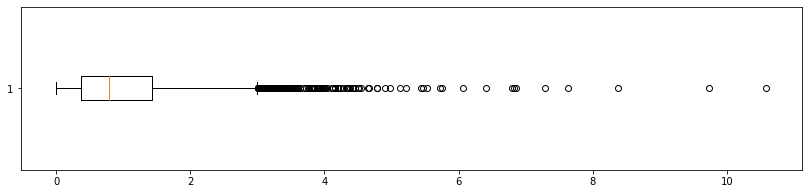

In [105]:
# predict and compute error
predicted = np.array([])

for i in range(len(test_X)):
    # x_input = X[i].reshape((1, n_steps))
    x_input = test_X[i].reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    predicted = np.append(predicted, yhat[0]) 

predicted = predicted.reshape(-1, 1)    
predicted = scaler.inverse_transform(predicted)
expected = scaler.inverse_transform(test_y)  
    
# abs difference
difference = abs((expected - predicted))

print('Mean Absolute Error = ', np.mean(difference))
# show boxplot
plt.figure(figsize = (14,3))
plt.boxplot(difference, vert= False);
plt.show()

### Trova il numero ottimale di neuroni 

number of nodes = 10: 0.000


NameError: name 'test_acc' is not defined

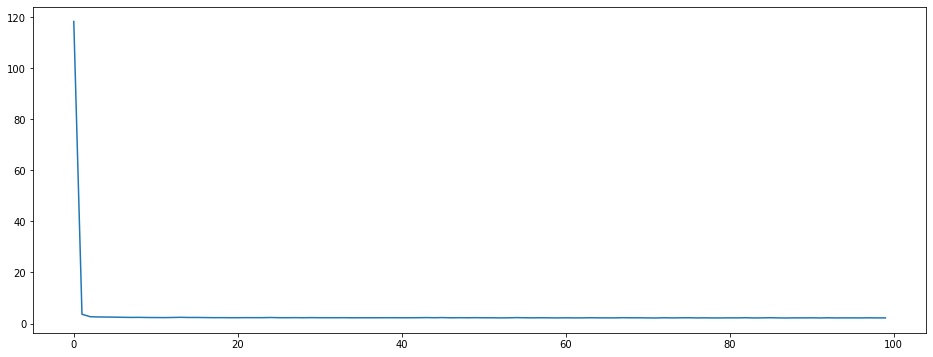

In [40]:
# fit model with given number of nodes, returns test set accuracy
def evaluate_model(n_nodes, train_X, train_y, val_X, val_y): 
    
    
    # define model
    model = Sequential()
    model.add(LSTM(n_nodes, activation='relu', input_shape=(n_steps, n_features))) 
    model.add(Dense(1))
    
    model.compile(loss='mse',optimizer='adam', metrics=[metrics.mae, 'accuracy'])

    history = model.fit(train_X, train_y, epochs=100, verbose=0)
    unk1, unk2, test_acc = model.evaluate(val_X, val_y, verbose=0)
    return history, test_acc  

plt.figure(figsize = (16, 6))
num_nodes = [10]

for n_nodes in num_nodes:
    # evaluate model with a given number of nodes
    history, result = evaluate_model(n_nodes, train_X, train_y, test_X, test_y)
    # summarize final test set accuracy
    print('number of nodes = %d: %.3f' % (n_nodes, result))
    
    # plot learning curve 
    plt.plot(history.history['loss'], label=str(n_nodes))
    plt.plot(test_acc.test_acc['val_loss'], label=str(n_nodes))
# show the plot
plt.legend(prop={'size': 14})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()